# FINAL PROJECT 4 KAMPUS MERDEKA HACKTIV8
Nama Kelompok :
- Kezario Muhammad Anaqi (PYTN-KS04-005)
- Helmi Saifullah Mansur (PYTN-KS04-010)

## 1. Overview (Perkenalan)
#### **Latar Belakang**
Bank adalah lembaga keuangan yang bertugas menghimpun dana dari masyarakat dan menyalurkan kembali dana tersebut ke masyarakat serta memberikan jasanya dalam alur pembayaran dan peredaran uang. Pada umumnya Bank dikenal sebagai lembaga keuangan yang kegiatan utamanya menerima simpanan, giro, tabungan dan deposito. Bank juga dikenal sebagai tempat untuk meminjam uang (kredit) bagi masyarakat yang membutuhkannya. Dengan adanya lembaga keuangan maupun non keuangan yang menjadi pilar perekonomian di Indonesia menjadikan banyak lembaga keuangan yang tumbuh didaerah daerah. Bank Perkreditan Rakyat merupakan salah satu lembaga keuangan yang ada di Indonesia.

Persaingan antar-bank saat ini menjadi sangat tinggi membuat setiap perusahaan harus memiliki strategi pemasaran produk perbankannya. Segmentasi pasar adalah salah satu strategi dalam dunia bisnis dengan mengelompokkan produk yang dimiliki sesuai dengan kesamaan, kemiripan, minat serta kebutuhan pelanggan. Alternatif strategi terhadap kegiatan pemasaran yang dilakukan sangat diperlukan agar perusahaan semakin tumbuh dan berkembang. Strategi pemasaran yang tepat dengan menetapkan segementasi pasar yang sesuai sasaran akan mempengaruhi pertumbuhan kreditnya.

#### **Dataset**
Dataset yang digunakan pada analisis ini yaitu credit card dataset yang diunduh dari kaggle melalui [link berikut](https://www.kaggle.com/arjunbhasin2013/ccdata)

Data ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut yaitu

1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases
3. ANCEFREQUENCY - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. CHASES - Amount of purchases made from account
5. FFPURCHASES - Maximum purchase amount done in one-go
6. TALLMENTSPURCHASES - Amount of purchase done in installment
7. ADVANCE - Cash in advance given by the user
8. CHASESFREQUENCY - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. OFFPURCHASESFREQUENCY - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. HASESINSTALLMENTSFREQUENCY - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. ADVANCEFREQUENCY - How frequently the cash in advance being paid
12. ADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user

#### **Objective yang Ingin Dicapai**
Objective yang ingin dicapai dalam analisis ini yaitu:

- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengelompokkan pengguna kartu kredit berdasarkan karakteristik teretentu ke dalam beberapa cluster

## 2. Import Pustaka yang Dibutuhkan
Cell pertama pada notebook harus berisi dan hanya berisi semua library
yang digunakan dalam project

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from umap import UMAP
import umap.plot

import pickle

## 3. Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

a. Melakukan loading data dengan menggunakan pandas

In [2]:
df = pd.read_csv("CC GENERAL.csv")

b. Melakukan setting untuk menampilkan semua kolom pada dataframe

In [3]:
pd.set_option("display.max_columns", None)

c. Melihat 5 baris teratas pada dataset

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


d. Melihat 5 baris terbawah dari dataset

In [5]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


e. melihat dimensi dataset

In [6]:
df.shape

(8950, 18)

dapat dilihat dataset memiliki dimensi 18 kolom/atribut dan 8950 baris

f. melihat informasi (kolom, baris, tipe data) pada dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

dapat dilihat dataset memiliki 17 atribut dengan tipe data float64 sebanyak 14, tipe data int64 sebanyak 3, dan tipe data object sebanyak 1. terlihat juga terdapat nilai yang hilang karena jumlah non-null tidak sesuai dengan jumlah entri.

g. Melihat rincian nama kolom pada dataset

In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

h. Mengecek apakah pada dataset terdapat missing value

In [9]:
df.isnull().values.any()

True

output menunjukkan 'True' yang berarti pada dataset masih terdapat missing value

i. Melihat statistik deskriptif dari masing-masing atribut yang bertipe numeric

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


j. Melihat statistik deskriptif dari masing-masing atribut yang bertipe object

In [11]:
df.describe(include='O').T

,count,unique,top,freq
CUST_ID,8950,8950,C14817,1


k. Melihat banyaknya unique values pada masing-masing atribut

In [12]:
for col in df.columns:
    print(col,':', df[col].nunique())

CUST_ID : 8950
BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 205
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8636
PRC_FULL_PAYMENT : 47
TENURE : 7


l. Mencoba melihat unique values pada kolom TENURE

In [13]:
df['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

## 4. Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

a. Melihat apakah terdapat duplikasi data pada dataset

In [14]:
df.duplicated().sum()

0

dapat dilihat tidak ada duplikasi data pada dataset

b. Melihat apakah terdapat missing values / nilai yang hilang pada tiap kolom

In [15]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

dari hasil diketahui terdapat missing value pada kolom `CREDIT_LIMIT` dengan jumlah 1 baris dan kolom `MINIMUM_PAYMENTS` dengan jumlah 313 baris

c. Melihat berapa persen missing value pada setiap kolom

In [16]:
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')
missing_value

CUST_ID                              0.0 %
BALANCE                              0.0 %
BALANCE_FREQUENCY                    0.0 %
PURCHASES                            0.0 %
ONEOFF_PURCHASES                     0.0 %
INSTALLMENTS_PURCHASES               0.0 %
CASH_ADVANCE                         0.0 %
PURCHASES_FREQUENCY                  0.0 %
ONEOFF_PURCHASES_FREQUENCY           0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY     0.0 %
CASH_ADVANCE_FREQUENCY               0.0 %
CASH_ADVANCE_TRX                     0.0 %
PURCHASES_TRX                        0.0 %
CREDIT_LIMIT                        0.01 %
PAYMENTS                             0.0 %
MINIMUM_PAYMENTS                     3.5 %
PRC_FULL_PAYMENT                     0.0 %
TENURE                               0.0 %
dtype: object

d. membuat visualisasi banyaknya missing value

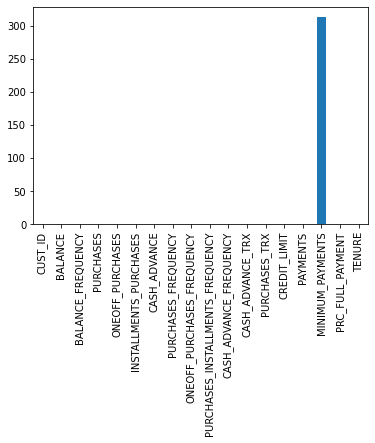

In [17]:
df.isnull().sum().plot.bar()
plt.show()

dapat dilihat kolom `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS` memiliki missing value

e. Melakukan penghapusan kolom `CUST_ID` karena tidak diperlukan

In [18]:
df = df.drop('CUST_ID', axis=1)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


f. Mengisi missing values pada kolom dengan median

In [19]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [20]:
df.isnull().values.any()

False

setelah dilakukan penanganan missing value didapakan sudah tidak ada missing value lagi pada dataset

f. Memberikan nama baru pada untuk setiap kolom atau atribut

In [21]:
df = df.rename(columns={'BALANCE':'Saldo', 'BALANCE_FREQUENCY':'FrekuensiSaldo', 'PURCHASES':'Pembelian', 
                        'ONEOFF_PURCHASES':'PembelianOneoff', 'INSTALLMENTS_PURCHASES':'PembelianAngsuran',
                        'CASH_ADVANCE':'PenarikanTunai', 'PURCHASES_FREQUENCY':'FrekuensiPembelian',
                        'ONEOFF_PURCHASES_FREQUENCY':'FrekuensiPembelianOneoff', 
                        'PURCHASES_INSTALLMENTS_FREQUENCY':'FrekuensiPembelianAngsuran', 
                        'CASH_ADVANCE_FREQUENCY':'FrekuensiPenarikanTunai', 'CASH_ADVANCE_TRX':'PenarikanTunaiTRX', 
                        'PURCHASES_TRX':'PembelianTRX', 'CREDIT_LIMIT':'BatasKredit', 'PAYMENTS':'Pembayaran',
                        'MINIMUM_PAYMENTS':'MinimalPembayaran', 'PRC_FULL_PAYMENT':'PembayaranFullPRC', 
                        'TENURE':'JangkaWaktu'})

df.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
df.columns

Index(['Saldo', 'FrekuensiSaldo', 'Pembelian', 'PembelianOneoff',
       'PembelianAngsuran', 'PenarikanTunai', 'FrekuensiPembelian',
       'FrekuensiPembelianOneoff', 'FrekuensiPembelianAngsuran',
       'FrekuensiPenarikanTunai', 'PenarikanTunaiTRX', 'PembelianTRX',
       'BatasKredit', 'Pembayaran', 'MinimalPembayaran', 'PembayaranFullPRC',
       'JangkaWaktu'],
      dtype='object')

g. Melihat banyaknya nilai dari masing-masing atribut

In [23]:
for col in df.columns:
    print(col, ': ')
    print(df[col].value_counts())
    print('\n','*'*60,'\n')

Saldo : 
0.000000       80
74.825456       1
155.676255      1
34.750769       1
2643.343414     1
               ..
3074.490820     1
110.474358      1
986.149218      1
593.785565      1
969.139152      1
Name: Saldo, Length: 8871, dtype: int64

 ************************************************************ 

FrekuensiSaldo : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.400000      10
0.555556      10
0.200000       9
0.125000       9
0.300000       9
0.375000       9
0.285714       8
0.250000       8
0.100000       8
0.444444       7
0.166667       7
0.142857       7
0.60000

## 5. Eksplorasi Data
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

a. Melihat statistik deskriptif pada dataset

In [24]:
df.describe()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Terlihat bahwa dalam dataset:

- Saldo/Balance rata-rata yaitu 1564 dan saldo maksimal yaitu 19043.
- Frekuensi Saldo memiliki skor rata-rata 0,87
- Pembelian/Purchases dengan maksimal 49039
- Batas kredit dengan minimal 50 dan maksimal 30000
- Pembayaran rata-rata yairu 1733.

b. Mencari Pembayaran minimal dan maksimal untuk Jangka waktu layanan kartu kredit untuk pengguna 12 bulan

In [25]:
df.loc[df['JangkaWaktu'] == 12, 'Pembayaran'].agg(('min', 'max'))

min        0.00000
max    50721.48336
Name: Pembayaran, dtype: float64

Dari hasil diketahui bahwa dengan  untuk Jangka waktu layanan kartu kredit untuk pengguna 12 bulan pembayaran minimal yaitu 0 dan pembayaran maksimal yaitu 50721.48336 (50721)

c. Mencari Penarikan Tunai terbesar dan terkecil

In [26]:
df.max(axis=0)['PenarikanTunai']

47137.21176

In [27]:
df.min(axis=0)['PenarikanTunai']

0.0

didapatkan penarikan tunai terbesar yaitu 47137.21176 dan penarikan tunai terkecil yaitu 0

d. Melihat proporsi data pada kolom Jangka Waktu dan Frekuensi Saldo dengan menggunakan crosstab

In [28]:
pd.crosstab(df.JangkaWaktu, df.FrekuensiSaldo)

FrekuensiSaldo,0.000000,0.090909,0.100000,0.111111,0.125000,0.142857,0.166667,0.181818,0.200000,0.222222,0.250000,0.272727,0.285714,0.300000,0.333333,0.363636,0.375000,0.400000,0.428571,0.444444,0.454545,0.500000,0.545455,0.555556,0.571429,0.600000,0.625000,0.636364,0.666667,0.700000,0.714286,0.727273,0.750000,0.777778,0.800000,0.818182,0.833333,0.857143,0.875000,0.888889,0.900000,0.909091,1.000000
JangkaWaktu,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,0,0,0,7,0,0,0,0,0,0,0,14,0,0,0,0,0,0,16,0,0,0,0,0,0,28,0,0,0,0,0,0,0,60,0,0,0,0,0,79
7,3,0,0,0,0,7,0,0,0,0,0,0,8,0,0,0,0,0,5,0,0,0,0,0,19,0,0,0,0,0,15,0,0,0,0,0,0,51,0,0,0,0,82
8,1,0,0,0,9,0,0,0,0,0,8,0,0,0,0,0,9,0,0,0,0,13,0,0,0,0,11,0,0,0,0,0,17,0,0,0,0,0,57,0,0,0,71
9,2,0,0,5,0,0,0,0,0,5,0,0,0,0,8,0,0,0,0,7,0,0,0,10,0,0,0,0,9,0,0,0,0,22,0,0,0,0,0,53,0,0,54
10,1,0,8,0,0,0,0,0,9,0,0,0,0,9,0,0,0,10,0,0,0,11,0,0,0,6,0,0,0,13,0,0,0,0,20,0,0,0,0,0,55,0,94
11,3,0,0,0,0,0,0,5,0,0,0,8,0,0,0,9,0,0,0,0,6,0,15,0,0,0,0,7,0,0,0,13,0,0,0,19,0,0,0,0,0,99,181
12,70,67,0,0,0,0,0,141,0,0,0,143,0,0,0,161,0,0,0,0,166,0,204,0,0,0,0,202,0,0,0,210,0,0,0,259,0,0,0,0,0,311,5650


e. Mengidentifikasi rata-rata (mean) Pembelian dengan melakukan grouping berdasarkan Jangka Waktu.

In [29]:
df_mean = df[['JangkaWaktu','Pembelian']].groupby('JangkaWaktu').mean().sort_values(by='Pembelian', ascending=False)
df_mean.T

JangkaWaktu,12,10,11,9,8,6,7
Pembelian,1088.192402,676.631271,571.222411,540.138171,468.858929,443.941667,424.559421


Dapat dilihat Jangka waktu layanan kartu kredit untuk pengguna 12 bulan memiliki rata-rata pembelian terbesar yaitu 1088.192402 dan Jangka waktu layanan kartu kredit untuk pengguna 7 bulan memiliki rata-rata pembelian terkecil yaitu 424.559421

f. Melihat data histori top 5 record dengan melakukan query, yang di mana:
- Jangka Waktu yaitu 6
- Banyak saldo 0
- Pembelian sebesar 0

In [30]:
df[
    (df['JangkaWaktu'] == 12) &
    (df['Saldo'] == 0.0) &
    (df['Pembelian'] == 0.0) 
].head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
654,0.0,0.0,0.0,0.0,0.0,310.888779,0.0,0.0,0.0,0.083333,1,0,9000.0,0.000000,312.343947,0.0,12
4021,0.0,0.0,0.0,0.0,0.0,181.649790,0.0,0.0,0.0,0.083333,1,0,2500.0,1140.957855,312.343947,0.0,12
5107,0.0,0.0,0.0,0.0,0.0,465.571691,0.0,0.0,0.0,0.083333,1,0,3000.0,6112.512276,312.343947,0.0,12
6052,0.0,0.0,0.0,0.0,0.0,72.388903,0.0,0.0,0.0,0.083333,1,0,3000.0,197.845282,312.343947,0.0,12
6878,0.0,0.0,0.0,0.0,0.0,100.519930,0.0,0.0,0.0,0.083333,1,0,2000.0,0.000000,312.343947,0.0,12


h. Visualisasi line plot korelasi antara Saldo dan Pembelian

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


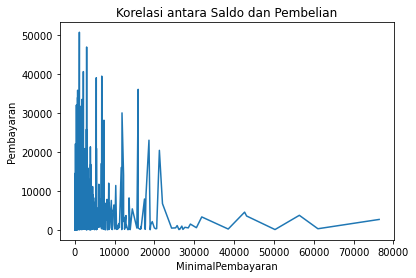

In [31]:
sns.lineplot('MinimalPembayaran','Pembayaran', data=df)
plt.title('Korelasi antara Saldo dan Pembelian')
plt.show()

Dapat disimpulkan bahwa Pembayaran selaju dengan MinimalPembayaran. Adapun anomali pada MinimalPembayaran ada pada 40000 - 80000

j. Melihat persebaran data kolom Jangka waktu layanan kartu kredit untuk pengguna dengan bar plot

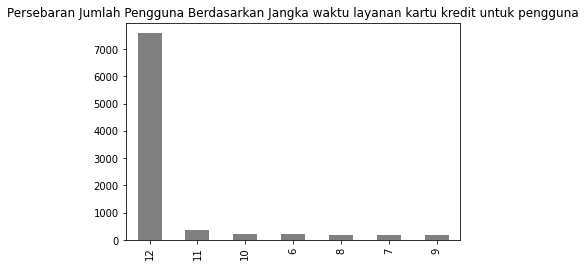

In [32]:
df['JangkaWaktu'].value_counts().plot.bar(color='grey')
plt.title('Persebaran Jumlah Pengguna Berdasarkan Jangka waktu layanan kartu kredit untuk pengguna')
plt.show()

Dapat dilihat persebaran data jumlah pengguna dengan Jangka waktu layanan kartu kredit untuk pengguna 12 bulan sangat banyak dengan jumlah diatas 7000, sedangakan jumlah pengguna dengan Jangka waktu layanan kartu kredit untuk pengguna 9 - 11 bulan rata-rata ada diangka kurang dari 1000

k. Visualisasi top 5 jumlah pembelian tertinggi pengguna

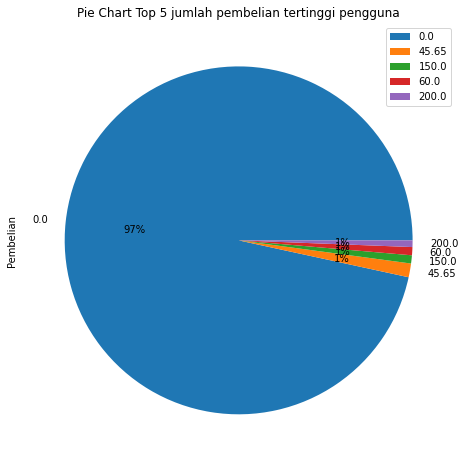

In [33]:
df_v = pd.DataFrame(df['Pembelian'].value_counts())
plot = df_v.head().plot.pie(y='Pembelian', figsize=(8, 8), autopct='%1.0f%%');

plt.title("Pie Chart Top 5 jumlah pembelian tertinggi pengguna")
plt.show()

dapat dilihat bahwa 5 jumlah pembelian tertinggi pengguna diantaranya 0.0, 45.65, 150.0, 60.0, dan 200.0

l. Visualisasi boxplot perbandingan Jangka waktu layanan kartu kredit untuk pengguna dan Batas Kredit

Text(0.5, 1.0, 'JangkaWaktu vs Batas Kredit')

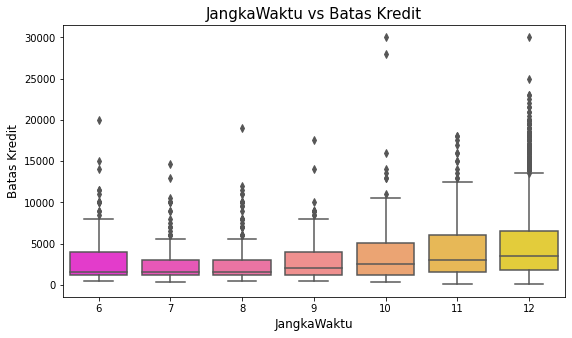

In [34]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='JangkaWaktu', y='BatasKredit', data=df, palette="spring")

plt.xlabel("JangkaWaktu", fontsize= 12)
plt.ylabel("Batas Kredit", fontsize= 12)
plt.title("JangkaWaktu vs Batas Kredit", fontsize= 15)

Dapat dilihat semua Jangka waktu layanan kartu kredit untuk pengguna memiliki outliers. Untuk Jangka waktu layanan kartu kredit untuk pengguna selama 12 bulan memiliki outliers yang sangat banyak sedangkan Jangka waktu layanan kartu kredit untuk pengguna selama 9 bulan memilikioutlierspaling sedikit.

j. Visualisasi boxplot perbandingan Jangka waktu layanan kartu kredit untuk pengguna dan Frekuensi saldo

Text(0.5, 1.0, 'JangkaWaktu vs Frekuensi saldo')

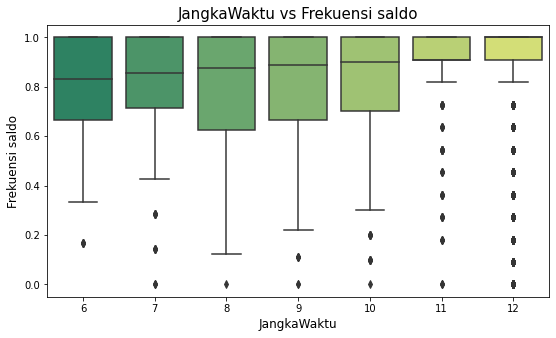

In [35]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='JangkaWaktu', y='FrekuensiSaldo', data=df, palette="summer")

plt.xlabel("JangkaWaktu", fontsize= 12)
plt.ylabel("Frekuensi saldo", fontsize= 12)
plt.title("JangkaWaktu vs Frekuensi saldo", fontsize= 15)

Dapat dilihat Jangka waktu 6, 8 dan 9 memiliki outliers sediki, sedangkan jangka waktu 11 dan 12 bulan memiliki outliers yang cukup banyak

k. Visualisasi scatterplot antara saldo dan pembelian

Text(0.5, 1.0, 'Saldo vs Pembelian')

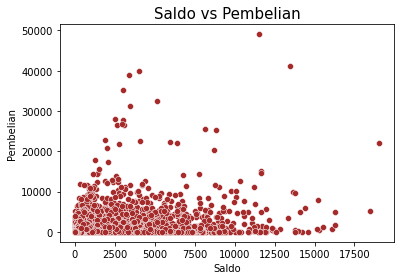

In [36]:
sns.scatterplot(x='Saldo', y='Pembelian', data=df, color='brown')
plt.title("Saldo vs Pembelian", fontsize= 15)

Dari plot dapat dilihat bahwa rata-rata pengguna kartu kredit memiliki saldo diantara 0 - 12500 dengan banyak pembelian rata-rata antara 0 - 10000. terlihat ada satu pengguna dengan pembelian yang tinggi hapir 50000 namun dengan saldo sekitar 12000.

l. Visualisasi violinplot antara kolom JangkaWaktu dan kolom BatasKredit

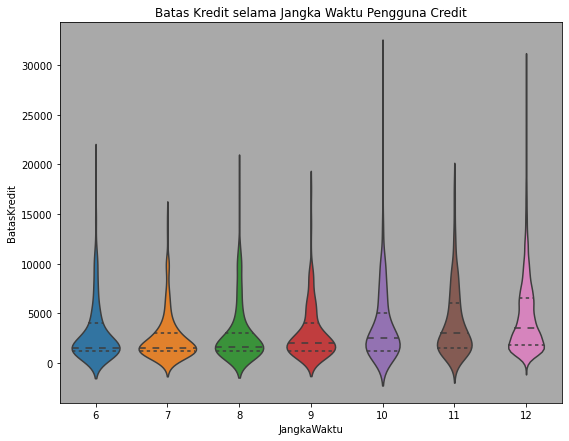

In [37]:
plt.figure(figsize=(9,7))
ax = plt.axes() 
ax.set_facecolor('darkgrey')
sns.violinplot(x='JangkaWaktu', y='BatasKredit', data=df, inner='quartile')
plt.xlabel('JangkaWaktu')
plt.ylabel('BatasKredit')
plt.title('Batas Kredit selama Jangka Waktu Pengguna Credit')
plt.show()

m. Visualisasi histogram masing-masing kolom data

array([[<AxesSubplot:title={'center':'Saldo'}>,
        <AxesSubplot:title={'center':'FrekuensiSaldo'}>,
        <AxesSubplot:title={'center':'Pembelian'}>,
        <AxesSubplot:title={'center':'PembelianOneoff'}>],
       [<AxesSubplot:title={'center':'PembelianAngsuran'}>,
        <AxesSubplot:title={'center':'PenarikanTunai'}>,
        <AxesSubplot:title={'center':'FrekuensiPembelian'}>,
        <AxesSubplot:title={'center':'FrekuensiPembelianOneoff'}>],
       [<AxesSubplot:title={'center':'FrekuensiPembelianAngsuran'}>,
        <AxesSubplot:title={'center':'FrekuensiPenarikanTunai'}>,
        <AxesSubplot:title={'center':'PenarikanTunaiTRX'}>,
        <AxesSubplot:title={'center':'PembelianTRX'}>],
       [<AxesSubplot:title={'center':'BatasKredit'}>,
        <AxesSubplot:title={'center':'Pembayaran'}>,
        <AxesSubplot:title={'center':'MinimalPembayaran'}>,
        <AxesSubplot:title={'center':'PembayaranFullPRC'}>],
       [<AxesSubplot:title={'center':'JangkaWaktu'}>, <Axes

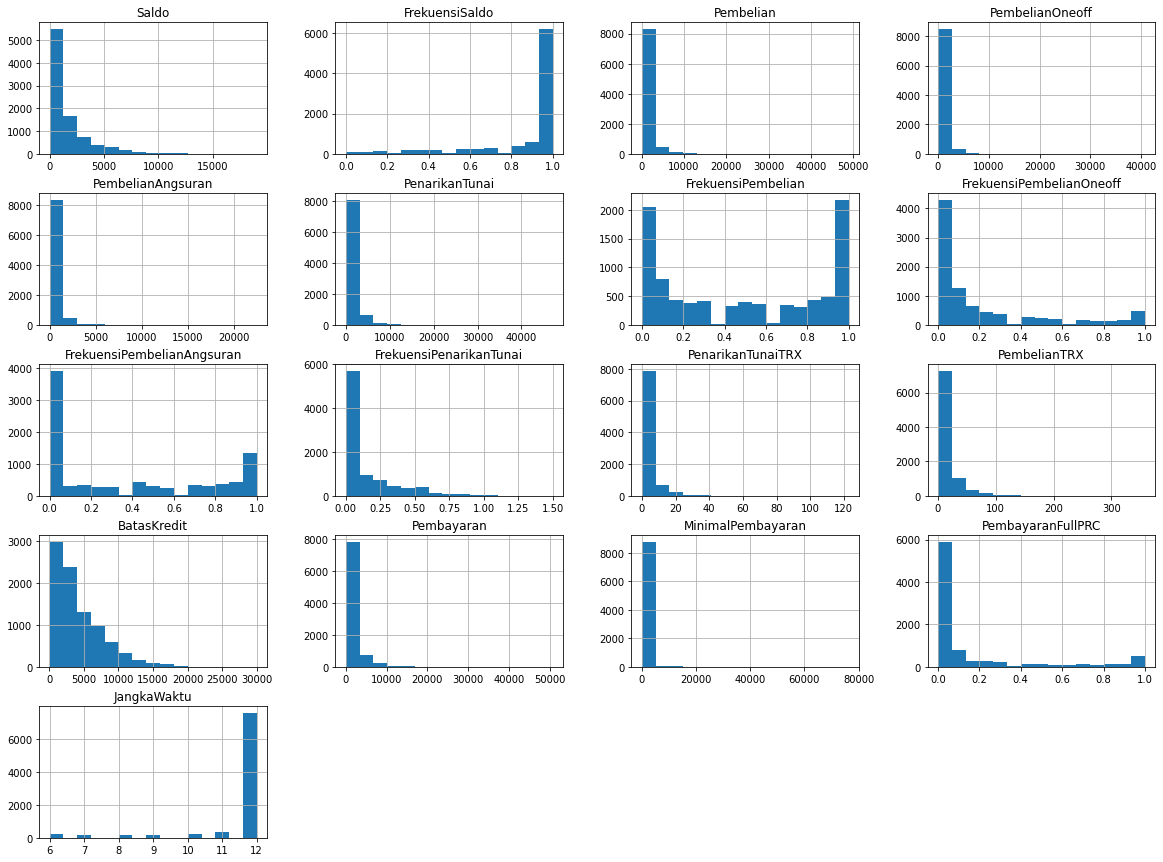

In [38]:
num_col = df.columns
df[num_col].hist(bins=15, figsize=(20, 15), layout=(5, 4))

n. Melakukan visualisasi korelasi antar variabel untuk melihat hubungan

In [39]:
df.corr()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
Saldo,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
FrekuensiSaldo,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
Pembelian,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
PembelianOneoff,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
PembelianAngsuran,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
PenarikanTunai,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
FrekuensiPembelian,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
FrekuensiPembelianOneoff,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
FrekuensiPembelianAngsuran,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
FrekuensiPenarikanTunai,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


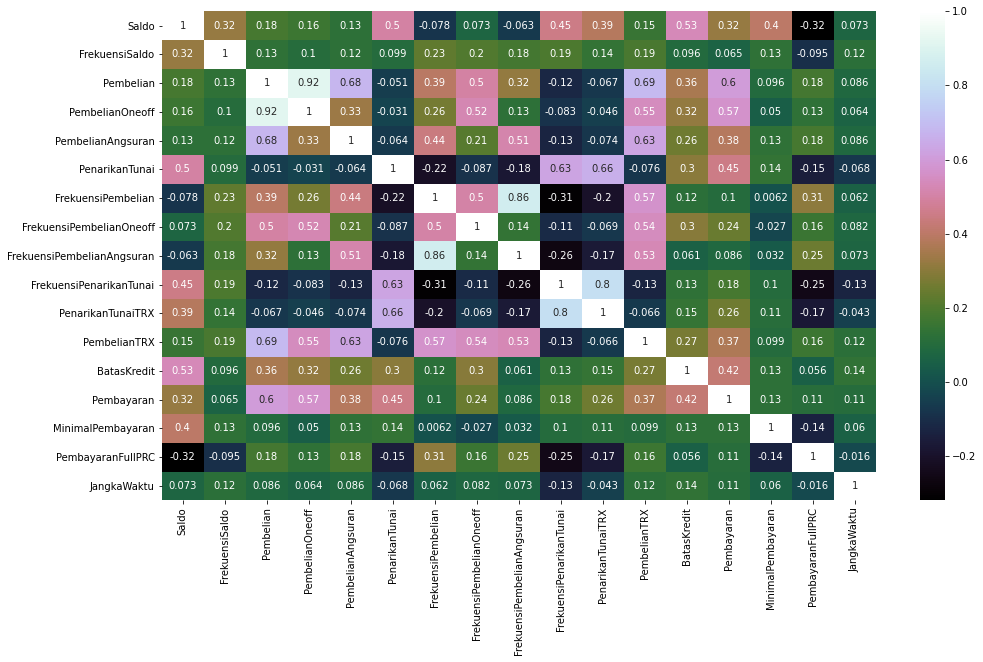

In [40]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix')
plt.show()

Dalam heatmap tersebut, terlihat bahwa terdapat kolerasi yang cukup tinggi antar kolom diantaranya :
- Kolom Pembelian dengan kolom PembelianOneoff dengan korelasi 0.92
- Kolom FrekuensiPembelian dengan kolom FrekuensiPembelianAngsuran dengan korelasi 0.86
- Kolom FrekuensiPenarikanTunai dengan kolom PenarikanTunaiTRX dengan korelasi 0.8

Dalam heatmap tersebut, juga terlihat bahwa terdapat kolerasi yang cukup rendah antar kolom diantaranya :
- Kolom Saldo dengan kolom PembayaranFullPRC dengan korelasi -0.32
- Kolom FrekuensiPembelian dengan kolom FrekuensiPenarikanTunai dengan korelasi -0.31
- Kolom FrekuensiPembelianAngsuran dengan kolom FrekuensiPenarikanTunsi dengan korelasi -0.26

## 6. Data Preprocessing
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

a. Melakukan standarisasi pada data

standarisasi, adalah tehnik lain dalam melakukan perubahan skala, dimana data yang dimiliki akan diubah sehingga memiliki rata rata = 0 (terpusat) dan standar deviasi = 1

In [41]:
# Standardize data
scaler = StandardScaler() 
scaled = scaler.fit_transform(df)

b. Melihat statistik dari data yang sudah di standarisasi

In [42]:
# Statistics of scaled data
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


c. Melihat hasil Hierarchical Clustering Dendrogram

Hierarchical Clustering adalah salah satu algoritma clustering yang dapat digunakan untuk meng-cluster dokumen (document clustering). Hasil keseluruhan dari algoritma hierarchical clustering secara grafik dapat digambarkan sebagai tree, yang disebut dengan dendogram.

In [43]:
hier_cluster = linkage(scaled_df, method='ward')

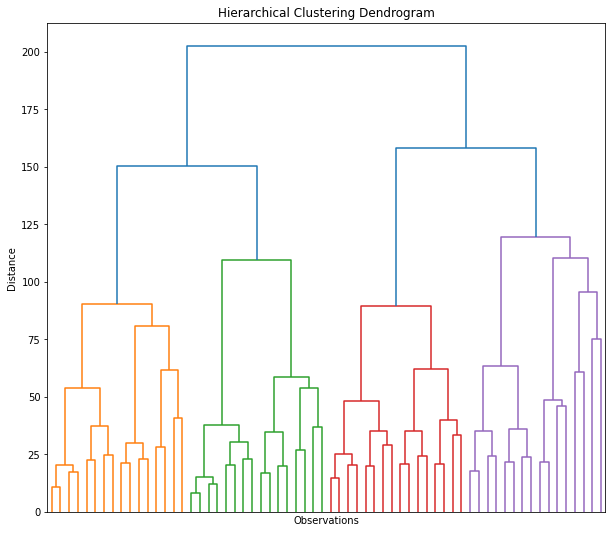

In [44]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_cluster, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

Pada hasil Hierarchical Clustering Dendrogram didapatkan ada sekitar 4 clade dimana Di atas ketinggian 125, jika menggambar garis horizontal, akan didapatkan 4 kelompok umum (cluster) pada data.

##  7. Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. seperti penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

Pada kasus ini kami menggunakan model K-Means Clustering dan PCA

**a. K-Means Clustering**

Alasan penggunaan model ini yaitu karena K-means adalah centroid-based algorithm, atau distance-based algorithm, dimana kita menghitung jarak untuk menetapkan titik ke sebuah cluster. Di K-Means, setiap cluster dikaitkan dengan centroid.

In [45]:
Kmean = KMeans(n_clusters=2)
Kmean

KMeans(n_clusters=2)

dalam metode K-Means Clustering, kami akan mengirimkan jumlah komponen sebanyak 2 (n_comonents=2). Disini beberapa komponen mewakili dimensi yang lebih rendah dimana kamiakan memproyeksikan data dimensi yng lebih tinggi.

**b. PCA (Principal Component Analysis)**

Alasan penggunaan model ini yaitu karena model PCA dapat digunakan untuk mengekstraksi informasi dari ruang dimensi tinggi dengan memproyeksikannya ke dalam sub-ruang berdimensi lebih rendah. PCA mencoba untukmempertahankan bagian penting yang memiliki lebih banyak variasi data dan menghapus bagian yang tidak penting dengan variasi yang lebih sedikit. Sehingga kita dengan mudah melihat dan menafsirkan data ke dalam beberapa cluster.

In [46]:
# PCA untuk dua Komponen Utama
pca = PCA()
pca

PCA()

dalam metode PCA, kami akan mengirimkan jumlah komponen mengikuti default dan akan mengikuti nilai dari variance. Disini beberapa komponen mewakili dimensi yang lebih rendah dimana kami akan memproyeksikan data dimensi yang lebih tinggi.

## 8. Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

**a. K-Means Clustering**

In [47]:
kmeansCluster = Kmean.fit(scaled_df)

In [48]:
kmeansCluster

KMeans(n_clusters=2)

**b. PCA (Principal Component Analysis)**

In [49]:
principalComponents = pca.fit_transform(scaled_df)

In [50]:
principalComponents

array([[-1.68364879e+00, -1.07224148e+00,  4.75660084e-01, ...,
         1.49962336e-01,  4.82655442e-02, -1.60528758e-04],
       [-1.13408493e+00,  2.50914981e+00,  6.02216308e-01, ...,
        -5.32950936e-01, -8.29086834e-02,  3.07157687e-06],
       [ 9.69394988e-01, -3.83576903e-01,  9.09697616e-02, ...,
         2.21683158e-01,  5.11324941e-01,  2.23296494e-05],
       ...,
       [-9.28985122e-01, -1.80804835e+00, -4.58242377e-01, ...,
         4.60675887e-01,  1.57799814e-01, -1.63043472e-04],
       [-2.33784475e+00, -6.53611332e-01,  9.82831153e-01, ...,
         2.63789927e-01, -1.89595873e-01, -8.58602334e-05],
       [-5.58026533e-01, -4.00646098e-01,  1.03364560e+00, ...,
        -4.18806582e-01,  3.57426555e-01, -7.42947186e-05]])

## 9. Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model.

**a. K-Means Clustering**

- Melihat jumlah clusters yang opttimal degan menggunakan elbow method

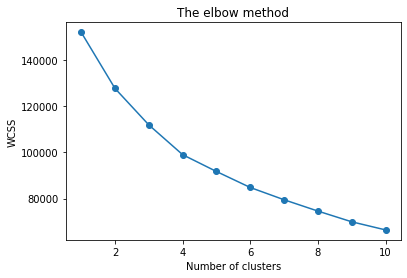

In [51]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

- Melatih model KMeans dengan n_clusters sebanyak 4

In [52]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=3)
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=3)

- Menambahkan KMeans Segment pada dataframe

In [53]:
data_kmeans = df.copy()
data_kmeans['KMeans Segment'] = kmeans.labels_

- Melihat transformasi data KMeans dengan melakukan groupby berdasarkan rata-rata KMeans segment

In [54]:
data_transf_kmeans = data_kmeans.groupby('KMeans Segment').mean()
data_transf_kmeans

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
KMeans Segment,,,,,,,,,,,,,,,,,
0,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
2,1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595


Dari hasil grouping segment KMeans, selanjutnya kami mencoba membuat kesimpulan tentang segment tersebut dan memberi nama pada segment tersebut.

Disini Penarikan Tunai berkaitan dengan penggunaan kartu kredit dengan penarikan tunai yang biasanya dikenakan biaya dan memiliki tingkat bunga.

- Melakukan pemberian nama pada segment

In [55]:
data_transf_kmeans.rename({0:'Pengguna Level Tengah (Middle Ground)', 
                           1:'Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers)', 
                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
KMeans Segment,,,,,,,,,,,,,,,,,
Pengguna Level Tengah (Middle Ground),4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
Penggua dengan Pembelian Kredit Tinggi (High Credit Frequent Purchasers),3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users),1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568
Pengguna Kredit Hemat (Frugal Credit Users),894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595


- Memasukkan Label KMeans Segment ke dalam dataframe dengan membuat kolom baru

In [56]:
data_kmeans['Labels'] = data_kmeans['KMeans Segment'].map({0:'Pengguna Level Tengah (Middle Ground)', 
                                                           1:'Pengguna dengan Kredit Pembelian Tinggi (High Credit Frequent Purchasers)', 
                                                           2:'Pengguna dengan Penarikan Tunai Tinggi (High Cash Advance Users)', 
                                                           3:'Pengguna Kredit Hemat (Frugal Credit Users)'})

data_kmeans.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,KMeans Segment,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2,Pengguna dengan Penarikan Tunai Tinggi (High C...
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,Pengguna Level Tengah (Middle Ground)
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,Pengguna Kredit Hemat (Frugal Credit Users)
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,2,Pengguna dengan Penarikan Tunai Tinggi (High C...
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2,Pengguna dengan Penarikan Tunai Tinggi (High C...


**Analisis Segment K-Means**

Disini dilakukan plotting atribut pada segment KMeans yang membagi data serta melihat perbedaan antara segmen pelanggan.

**_Transaksi Pembelian vs Pembelian_**

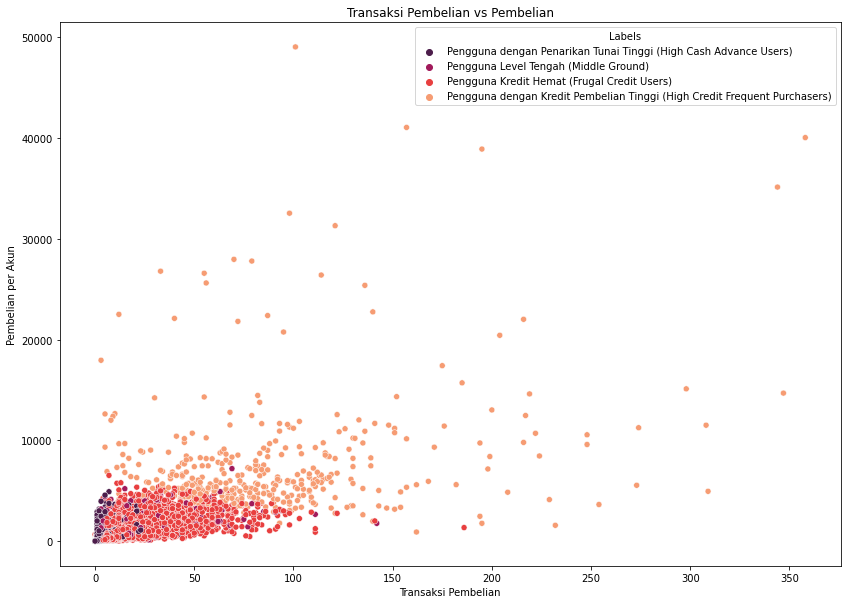

<Figure size 432x288 with 0 Axes>

In [57]:
#sekarang kita dapat mengilustrasikan grup berdasarkan beberapa fitur dalam scatterplot

plt.figure(figsize=(14,10))
X = data_kmeans['PembelianTRX']
Y = data_kmeans['Pembelian']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Transaksi Pembelian')
g.set_ylabel('Pembelian per Akun')
g.set_title('Transaksi Pembelian vs Pembelian')
plt.show()

plt.savefig("Transaksi Pembelian vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik terlihat dari 4 cluster, cluster Pengguna dengan kredit pembelian tinggi (pink) terdapat transaksi pembelian sampai melebihi 350 dan pembelian per akun melebihi 40000. Sedangkan untuk ketiga cluster lainnya pembelian per akun hanya kurang dari 10000

**_Saldo Akun vs Pembelian_**

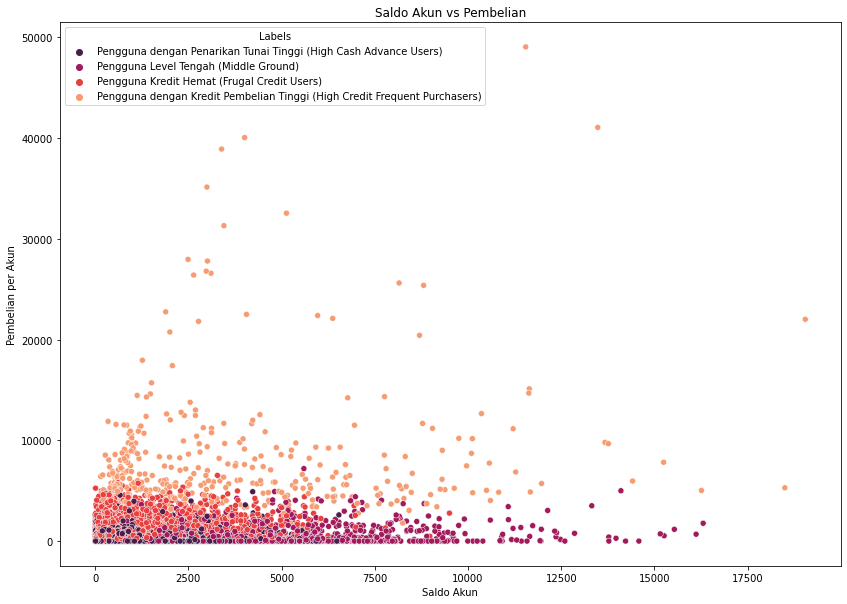

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize=(14,10))
X = data_kmeans['Saldo']
Y = data_kmeans['Pembelian']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Saldo Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Saldo Akun vs Pembelian')
plt.show()

plt.savefig("Saldo Akun vs Pembelian KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik terlihat bahwa cluster Pengguna Level tengah (ungu muda) dan cluster pengguna dengan kredit pembelian tinggi (pink) memiliki saldo yang besar, namun perbedaannya terlihat pada pembelian per akun. cluster Pengguna Level tengah (ungu muda) terlihat tidak banyak melakukan pembelian berbeda dengan luster pengguna dengan kredit pembelian tinggi (pink) yang banyak melakukan pembelian

**_Tingkat Frekuensi  Pembelian vs Transaksi Pembelian_**

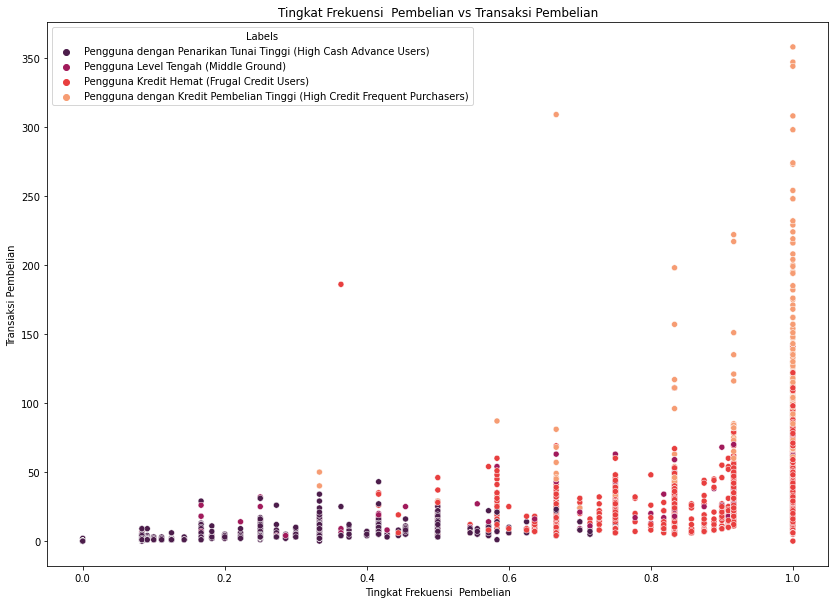

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(14,10))
X = data_kmeans['FrekuensiPembelian']
Y = data_kmeans['PembelianTRX']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Tingkat Frekuensi  Pembelian')
g.set_ylabel('Transaksi Pembelian')
g.set_title('Tingkat Frekuensi  Pembelian vs Transaksi Pembelian')
plt.show()

plt.savefig("Tingkat Frekuensi  Pembelian vs Transaksi Pembelian KMeans.png")

Dari grafik terlihat bahwa cluster Pengguna dengan penarikan tunai tinggi (ungu tua) dan cluster Pengguna level tengah (ungu muda) rata-rata memiliki tingkat frekuensi pembelian mulai dari 0.0 sampai kurang lebih 0.7 dengan transaksi pembelian kurang dari 100.

Sedangkan cluster Pengguna kredit hemat (merah) dan cluster Pengguna dengan kredit pembelian tinggi (pink) rata-rata memiliki  tingkat frekuensi pembelian mulai dari 0.3 sampai dengan 1.0 dengan banyaknya transaksi pembelian bisa mencapai lebih dari 100

**_Batas Kredit Akun vs Pembelian per Akun_**

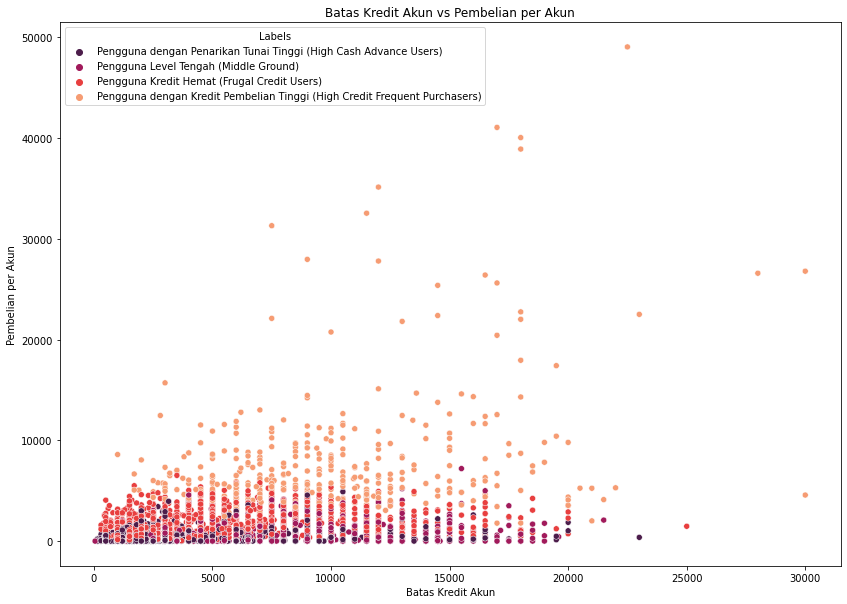

<Figure size 432x288 with 0 Axes>

In [60]:
plt.figure(figsize=(14,10))
X = data_kmeans['BatasKredit']
Y = data_kmeans['Pembelian']
g = sns.scatterplot(x=X, y=Y, hue = data_kmeans['Labels'], palette = 'rocket')
g.set_xlabel('Batas Kredit Akun')
g.set_ylabel('Pembelian per Akun')
g.set_title('Batas Kredit Akun vs Pembelian per Akun')
plt.show()

plt.savefig("Batas Kredit Akun vs Pembelian per Akun KMeans.png",
            bbox_inches ="tight",
            pad_inches = 1,
            orientation ='landscape')

Dari grafik terlihat bahwa rata-rata cluster memiliki batas kredit akun kurang lebih 20000 serta terdapat beberapa yang  lebih. Namun cluster  Pengguna dengan kredit pembelian tinggi (pink) dengan batas kredit tersebut tetap melakukan banyak pembelian melebihi 10000 bahkan terdapat beberapa yang melebihi 30000

**b. PCA (Principal Component Analysis)**

- Melihat nilai variance ratio dari pca

In [61]:
pca.explained_variance_ratio_

array([2.72976713e-01, 2.03137796e-01, 8.81318170e-02, 7.47952439e-02,
       6.22472925e-02, 5.74005645e-02, 4.88342555e-02, 4.29920325e-02,
       3.79825870e-02, 3.08000227e-02, 2.37225104e-02, 1.77336964e-02,
       1.42785685e-02, 1.21691956e-02, 1.01266703e-02, 2.67034839e-03,
       6.85226796e-07])

- Visualisai Principal Components Variance untuk melihat nilai dari components beserta besarnya variance yang ditangkap

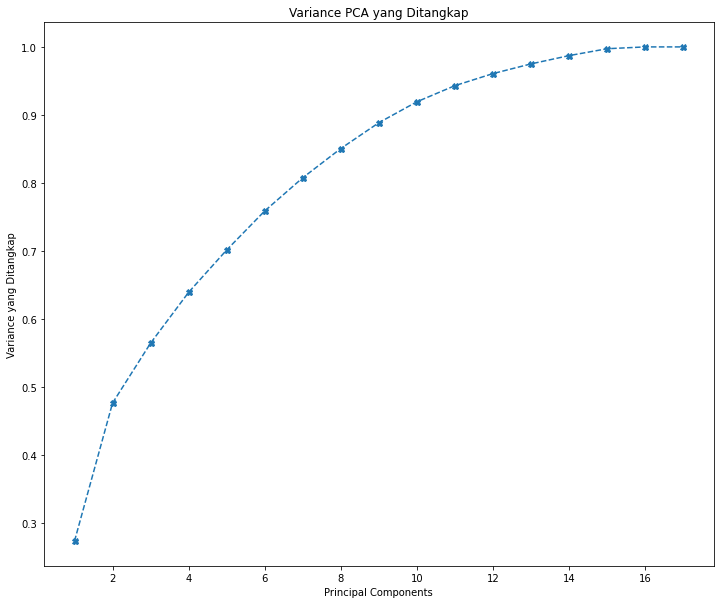

In [62]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='X', linestyle='--', )
plt.title('Variance PCA yang Ditangkap')
plt.xlabel('Principal Components')
plt.ylabel('Variance yang Ditangkap')
plt.show()

We got a considerable number of components, and like our KMeans algorirthm, no crystalized cutoff. We can try setting the bar at 80% variance and keep 7 of the components to keep from our analysis here and continue.

Dari visualisasi terlihat didapatkan cukup banyak komponen, dan seperti algoritma KMeans, tidak terdapat crystalized cutoff. Kemudian kami mengatur nilai standar pada variance 80% dengan menggaunakan 7 componets 

- Menjalankan ulang PCA dengan nilai principal components yang sudah dipilih

In [63]:
pca = PCA(n_components=7, random_state = 42)
pca.fit(scaled_df)
pca.components_

array([[ 0.10173497,  0.12049041,  0.4115624 ,  0.34633416,  0.33676092,
        -0.02280988,  0.32123217,  0.29449254,  0.27449428, -0.08858206,
        -0.04813551,  0.39059872,  0.21191634,  0.26648154,  0.06326867,
         0.13183285,  0.0810856 ],
       [ 0.40381873,  0.13134414,  0.04002462,  0.06191772, -0.01917539,
         0.43902651, -0.19114801, -0.01856091, -0.17886875,  0.43412117,
         0.41964355, -0.02016821,  0.23802849,  0.25671565,  0.16906581,
        -0.19006529, -0.00425524],
       [-0.16163198, -0.42299545,  0.25747423,  0.39089919, -0.10926846,
        -0.02312809, -0.37139443,  0.11556486, -0.46957883, -0.10470904,
        -0.11034514, -0.07592937,  0.10068174,  0.27735866, -0.23451664,
         0.12647724, -0.06798872],
       [ 0.27931641,  0.15576173,  0.04162083,  0.08507909, -0.05791521,
        -0.25659565, -0.19456427,  0.03427937, -0.22528752, -0.26462842,
        -0.32838559, -0.0207944 ,  0.13153307, -0.11214809,  0.39256028,
        -0.41957367

- membuat DataFrame yang akan memiliki nilai principal component untuk semua sampel.

In [64]:
pca_df = pd.DataFrame(data = pca.components_, columns = df.columns.values,
                      index = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])
pca_df

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
PCA1,0.101735,0.120490,0.411562,0.346334,0.336761,-0.022810,0.321232,0.294493,0.274494,-0.088582,-0.048136,0.390599,0.211916,0.266482,0.063269,0.131833,0.081086
PCA2,0.403819,0.131344,0.040025,0.061918,-0.019175,0.439027,-0.191148,-0.018561,-0.178869,0.434121,0.419644,-0.020168,0.238028,0.256716,0.169066,-0.190065,-0.004255
PCA3,-0.161632,-0.422995,0.257474,0.390899,-0.109268,-0.023128,-0.371394,0.115565,-0.469579,-0.104709,-0.110345,-0.075929,0.100682,0.277359,-0.234517,0.126477,-0.067989
PCA4,0.279316,0.155762,0.041621,0.085079,-0.057915,-0.256596,-0.194564,0.034279,-0.225288,-0.264628,-0.328386,-0.020794,0.131533,-0.112148,0.392560,-0.419574,0.437548
PCA5,0.051022,-0.476836,0.027887,-0.160839,0.361402,0.097560,-0.099667,-0.540330,0.176996,-0.145160,-0.083884,-0.036237,0.086303,0.200851,0.415045,0.143363,-0.001838
PCA6,0.042752,0.022045,0.180453,0.179984,0.096003,-0.145018,-0.046867,-0.003524,-0.048051,0.058183,-0.064631,0.100930,-0.320143,-0.116040,0.290166,-0.352643,-0.745456
PCA7,-0.254182,0.100801,0.200220,0.120685,0.251771,-0.048730,-0.150818,-0.281432,0.038003,0.144220,0.198738,0.109343,-0.557414,0.156826,-0.200462,-0.300495,0.404204


- Visualisasi components menggunakan heatmap (opsional)

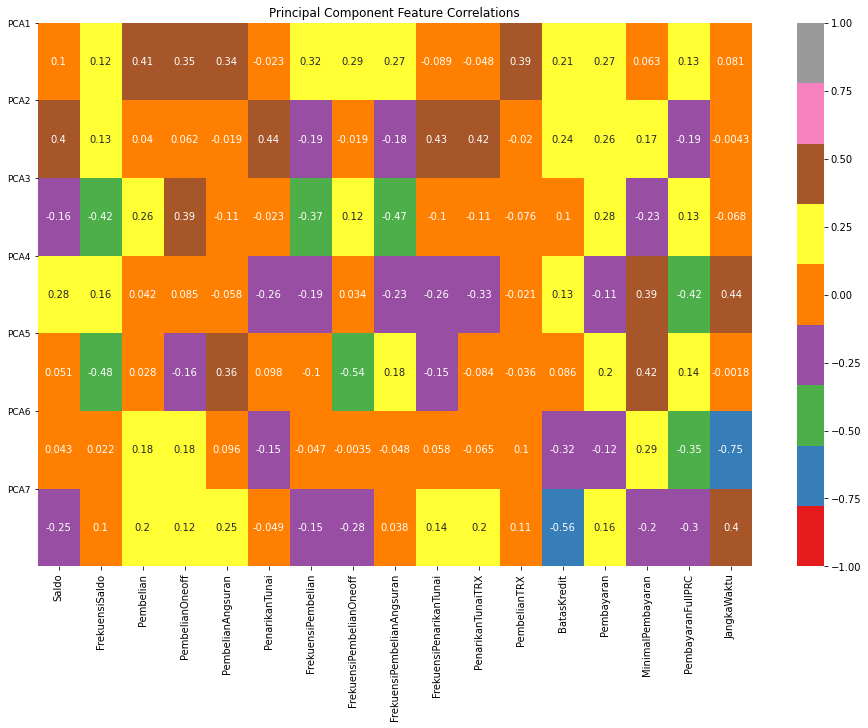

In [65]:
plt.figure(figsize=(16,10))
sns.heatmap(pca_df, vmin=-1, vmax=1, cmap='Set1', annot=True)
plt.title('Principal Component Feature Correlations')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'],rotation=0, fontsize=9)
plt.show()

dari hasil heatmap diketahui nilai korerasi tertiggi yaitu 0.44 yang dimiliki PCA2 yang berkorelasi dengan penarikanTunai dan PCA4 yang berkorelasi dengan JangkaWaktu

- Melihat score PCA dari transform data yang sudah di scaled

In [66]:
pca_scores = pca.transform(scaled_df)
pca_scores

array([[-1.68364879, -1.07224148,  0.47566008, ...,  0.04319508,
         0.06806942,  0.82215526],
       [-1.13408493,  2.50914981,  0.60221631, ...,  0.66263777,
        -1.10225463, -0.38428208],
       [ 0.96939499, -0.3835769 ,  0.09096976, ..., -2.16658421,
        -0.32018501, -1.54249644],
       ...,
       [-0.92898512, -1.80804835, -0.45824238, ...,  0.23461525,
         2.98078368, -1.4032653 ],
       [-2.33784475, -0.65361133,  0.98283115, ..., -0.0702759 ,
         3.17948406, -0.97353358],
       [-0.55802653, -0.4006461 ,  1.0336456 , ..., -1.44034346,
         3.67556151, -1.4192505 ]])

- Melihat dimensi dari pca_scores (opsional)

In [67]:
pca_scores.shape

(8950, 7)

- Melakukan clustering ulang pada data component PCA yang sudah diubah dengan menggunakan KMeans

In [68]:
wcss = []
for i in range(1, 18):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++')
    kmeans_pca.fit(pca_scores)
    wcss.append(kmeans_pca.inertia_)

- Visualisasi untuk melihat jumlah cluster yang cocok dengan menggunakan elbow method

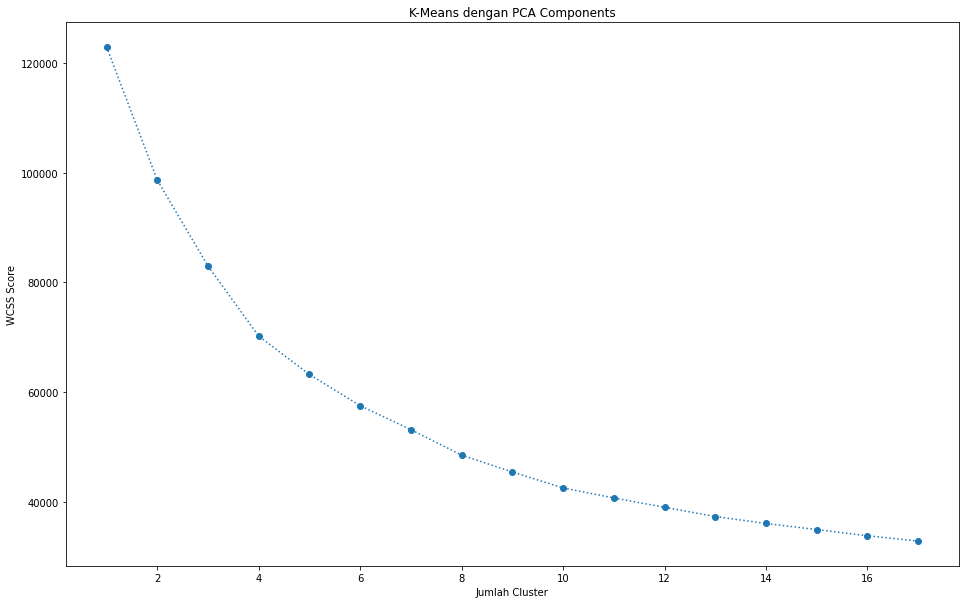

In [69]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 18), wcss, marker='o', linestyle='dotted')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS Score')
plt.title('K-Means dengan PCA Components')
plt.show()

Berdasarkan visualisasi didapatkan jumlah cluster dimulai dari 4 dan seterusnya memiliki nilai atau jarak yang optimal. Namun disini kami memilih nilai cluster sebanyak 4 dengan memperhatikan computation cost sambil menentukan jumlah cluster. Jika kita menambah jumlah cluster, maka computation cost juga akan meningkat. Jadi, jika kita tidak memiliki sumber daya komputasi yang tinggi, disarankan untuk memilih jumlah cluster yang lebih sedikit.

- Melatih model untuk Kmeans PCA dengan n_cluster sebanyak 4

In [70]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(pca_scores)

KMeans(n_clusters=4, random_state=42)

- Menamahakan nilai segment KMeans PCA dan nilai component pada dataframe dengan membuat kolom baru

In [71]:
pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(pca_scores)], axis=1)
pca_kmeans.columns.values[-7:] = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7']

pca_kmeans['K-Means PCA Segment'] = kmeans_pca.labels_
pca_kmeans

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,K-Means PCA Segment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-1.683649,-1.072241,0.475660,0.679928,0.043195,0.068069,0.822155,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,-1.134085,2.509150,0.602216,-0.109542,0.662638,-1.102255,-0.384282,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.969395,-0.383577,0.090970,1.238359,-2.166584,-0.320185,-1.542496,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,-0.888220,0.004648,1.499800,1.075271,0.225828,-0.171540,-0.236644,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-1.600021,-0.683795,0.347927,1.013642,-0.453816,0.077004,0.698278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,-0.362572,-2.013437,-0.975609,-2.742418,0.124714,2.673427,-1.561393,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,-0.580810,-1.675663,-1.222354,-1.980537,-0.073504,3.312539,-1.068590,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,-0.928985,-1.808048,-0.458242,-2.296301,0.234615,2.980784,-1.403265,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,-2.337845,-0.653611,0.982831,-1.847692,-0.070276,3.179484,-0.973534,0


Sekarang dataframe memiliki original features, jumlah PCA Component tetap, dan kolom label segmen yang sesuai dengan clustering KMeans yang diterapkan ke jumlah grup yang tetap

- Melakukan grouping berdasarkan segmennya dan melihat mean dari semua feaures dan PCA Components

In [72]:
pca_kmeans_freq = pca_kmeans.groupby(['K-Means PCA Segment']).mean()
pca_kmeans_freq

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
K-Means PCA Segment,,,,,,,,,,,,,,,,,,,,,,,,
0,997.185640,0.788455,277.303846,212.843294,64.797720,575.005205,0.180152,0.087680,0.088775,0.112338,2.064684,3.047088,3257.002065,965.023182,560.770922,0.078348,11.438662,-1.322516,-0.218583,0.599202,0.313429,0.075229,0.135908,0.171128
1,941.673966,0.940034,1313.785955,639.477174,674.494366,211.463240,0.892354,0.310055,0.719547,0.042847,0.797623,23.552155,4344.270506,1388.262543,643.907252,0.273324,11.614562,1.061781,-1.093821,-0.697753,-0.273701,-0.129658,-0.149807,-0.163098
2,4561.536308,0.968393,484.558963,306.170156,178.472486,4498.028573,0.282127,0.135138,0.182097,0.481553,14.182716,7.453498,7493.213618,3460.123876,1974.461431,0.035695,11.387654,-0.492024,3.476758,-0.399478,-0.401468,0.033372,-0.236072,-0.263570
3,3783.301905,0.986106,8507.860776,5730.311493,2779.340328,788.274440,0.943786,0.748299,0.779055,0.080570,2.477612,92.683582,10027.164179,8185.716327,2189.511492,0.288089,11.958209,7.048560,1.010246,1.240364,0.430160,0.275235,0.724000,0.533016


Setelah menerapkan ulang model KMeans, kemudian dengan PCA Component kami harus memilih nama yang sesuai lagi. Atribut akan mengikuti pola yang sama dengan data tanpa PCA Component, sehingga kami memilih untuk menggunakan nama segmen yang sama seperti sebelumnya di sini.

- Melihat Perolehan jumlah observasi (pengamatan) dan proporsi observasi (pengamatan) dalam setiap segmen

In [73]:
pca_kmeans_freq['JumlahPengamatan'] = pca_kmeans[['K-Means PCA Segment', 'Saldo']].groupby(['K-Means PCA Segment']).count()
pca_kmeans_freq['ProporsiPengamatan'] = pca_kmeans_freq['JumlahPengamatan'] / pca_kmeans_freq['JumlahPengamatan'].sum()
pca_kmeans_freq = pca_kmeans_freq.rename({0:'Pengguna Level Tengah', 
                                          1:'Pengguna dengan Penarikan Tunai Tinggi', 
                                          2:'Pengguna Kredit Hemat', 
                                          3:'Penggnua dengan Pembelian Kredit Tinggi'})
pca_kmeans_freq

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,JumlahPengamatan,ProporsiPengamatan
K-Means PCA Segment,,,,,,,,,,,,,,,,,,,,,,,,,,
Pengguna Level Tengah,997.185640,0.788455,277.303846,212.843294,64.797720,575.005205,0.180152,0.087680,0.088775,0.112338,2.064684,3.047088,3257.002065,965.023182,560.770922,0.078348,11.438662,-1.322516,-0.218583,0.599202,0.313429,0.075229,0.135908,0.171128,4035,0.450838
Pengguna dengan Penarikan Tunai Tinggi,941.673966,0.940034,1313.785955,639.477174,674.494366,211.463240,0.892354,0.310055,0.719547,0.042847,0.797623,23.552155,4344.270506,1388.262543,643.907252,0.273324,11.614562,1.061781,-1.093821,-0.697753,-0.273701,-0.129658,-0.149807,-0.163098,3365,0.375978
Pengguna Kredit Hemat,4561.536308,0.968393,484.558963,306.170156,178.472486,4498.028573,0.282127,0.135138,0.182097,0.481553,14.182716,7.453498,7493.213618,3460.123876,1974.461431,0.035695,11.387654,-0.492024,3.476758,-0.399478,-0.401468,0.033372,-0.236072,-0.263570,1215,0.135754
Penggnua dengan Pembelian Kredit Tinggi,3783.301905,0.986106,8507.860776,5730.311493,2779.340328,788.274440,0.943786,0.748299,0.779055,0.080570,2.477612,92.683582,10027.164179,8185.716327,2189.511492,0.288089,11.958209,7.048560,1.010246,1.240364,0.430160,0.275235,0.724000,0.533016,335,0.037430


- Visualisasi Jumlah Observasi (Pengamatan) per segment

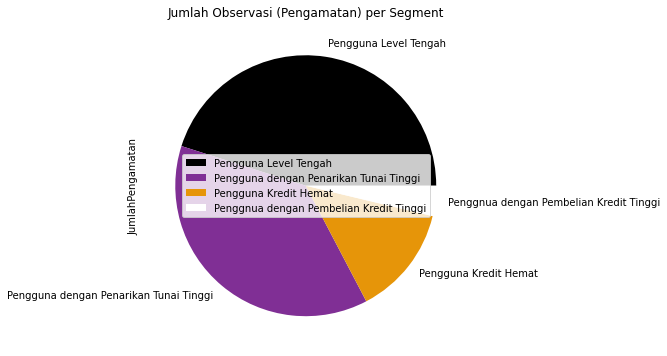

In [74]:
pca_kmeans_freq.plot.pie(y='JumlahPengamatan', figsize=(6, 6), cmap='CMRmap')
plt.legend(loc='center')
plt.title('Jumlah Observasi (Pengamatan) per Segment')
plt.show()

Dari visualisasi terlihat bahwa segment memiliki jumlah record yang berbeda. Urutan grup juga diubah ketika memasukkan PCA Component berdasarkan KMeans  clustering.

- Membuat visualisasi plot beberapa PCA Component satu sama lain dengan memberi warna pada segmen KMeans 

In [75]:
pca_kmeans['Legend'] = pca_kmeans['K-Means PCA Segment'].map({0:'Pengguna Level Tengah', 
                                                              1:'Pengguna dengan Penarikan Tunai Tinggi',
                                                              2:'Pengguna Kredit Hemat', 
                                                              3:'Pengguna dengan Pembelian Kredit Tinggi'})

Karena terdapat beberapa PCA Component, jadi akan sedikit rumit untuk merencanakan dan menyimpan semua kemungkinan kombinasi komponen di sini. maka kami akan memplot komponen yang dipilih.

- **Plotting PCA Components**

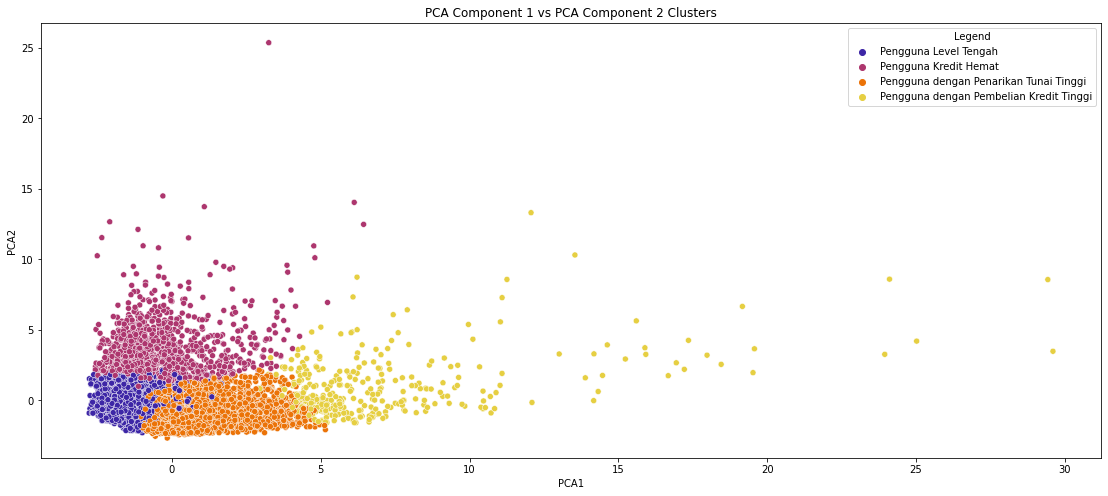

<Figure size 432x288 with 0 Axes>

In [76]:
# Plotting perbandingan PCA 1 dan PCA 2

X = pca_kmeans['PCA1']
Y = pca_kmeans['PCA2']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 1 vs PCA Component 2 Clusters')
plt.show()

plt.savefig("PCA Component 1 vs PCA Component 2 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

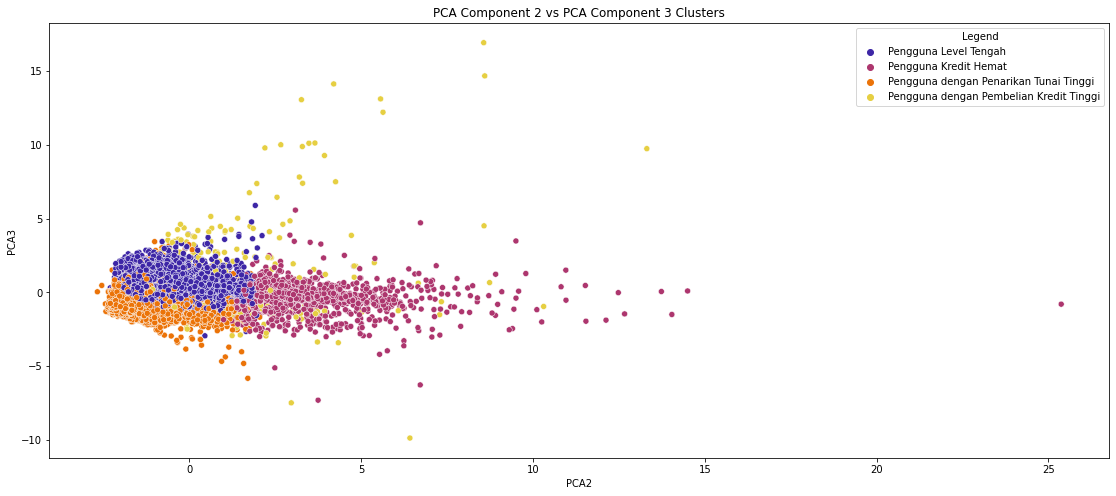

<Figure size 432x288 with 0 Axes>

In [77]:
# Plotting perbandingan PCA 2 dan PCA 3

X = pca_kmeans['PCA2']
Y = pca_kmeans['PCA3']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 2 vs PCA Component 3 Clusters')
plt.show()

plt.savefig("PCA Component 2 vs PCA Component 3 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

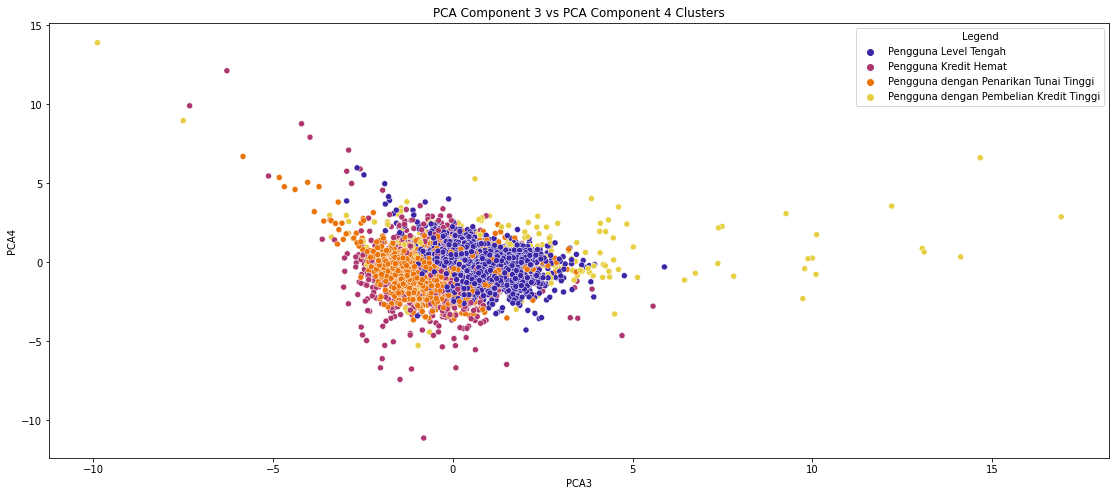

<Figure size 432x288 with 0 Axes>

In [78]:
# Plotting perbandingan PCA 3 dan PCA 4

X = pca_kmeans['PCA3']
Y = pca_kmeans['PCA4']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 3 vs PCA Component 4 Clusters')
plt.show()

plt.savefig("PCA Component 3 vs PCA Component 4 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

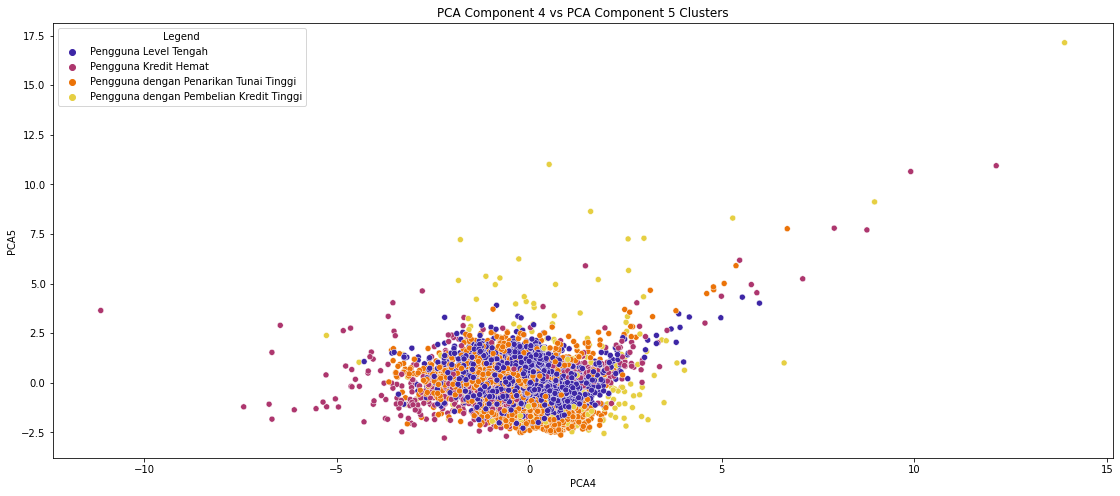

<Figure size 432x288 with 0 Axes>

In [79]:
# Plotting perbandingan PCA 4 dan PCA 5

X = pca_kmeans['PCA4']
Y = pca_kmeans['PCA5']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 4 vs PCA Component 5 Clusters')
plt.show()

plt.savefig("PCA Component 4 vs PCA Component 5 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

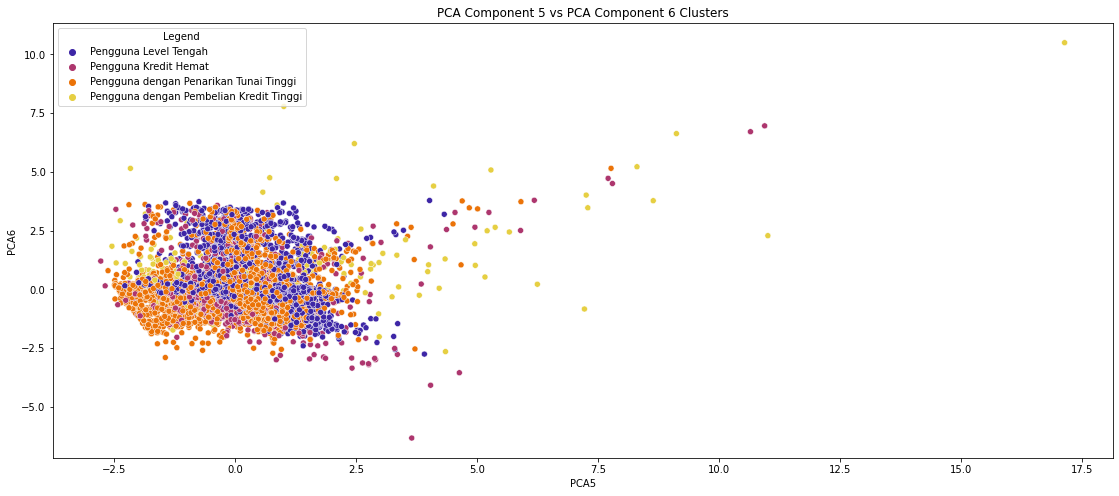

<Figure size 432x288 with 0 Axes>

In [80]:
# Plotting perbandingan PCA 5 dan PCA 6

X = pca_kmeans['PCA5']
Y = pca_kmeans['PCA6']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 5 vs PCA Component 6 Clusters')
plt.show()

plt.savefig("PCA Component 5 vs PCA Component 6 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

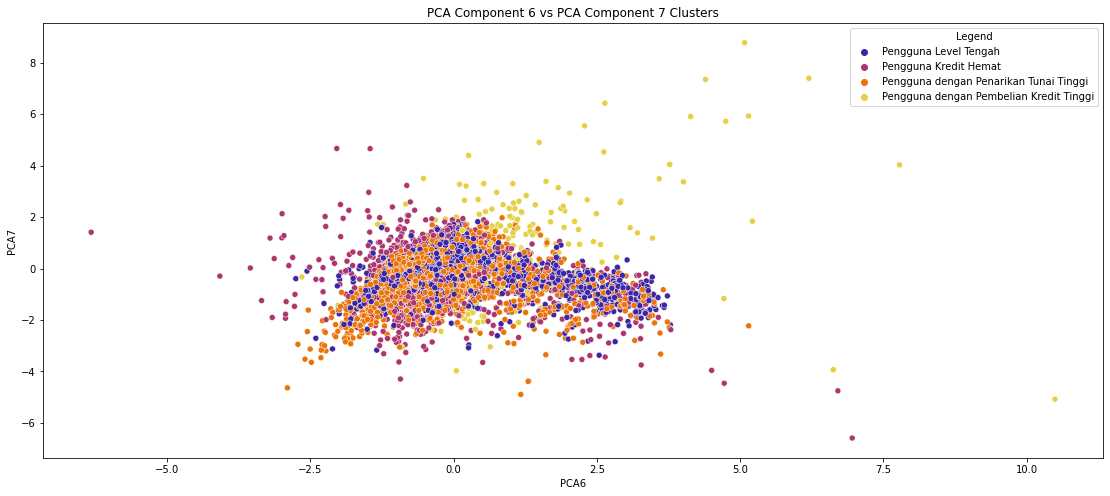

<Figure size 432x288 with 0 Axes>

In [81]:
# Plotting perbandingan PCA 6 dan PCA 7

X = pca_kmeans['PCA6']
Y = pca_kmeans['PCA7']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 6 vs PCA Component 7 Clusters')
plt.show()

plt.savefig("PCA Component 6 vs PCA Component 7 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

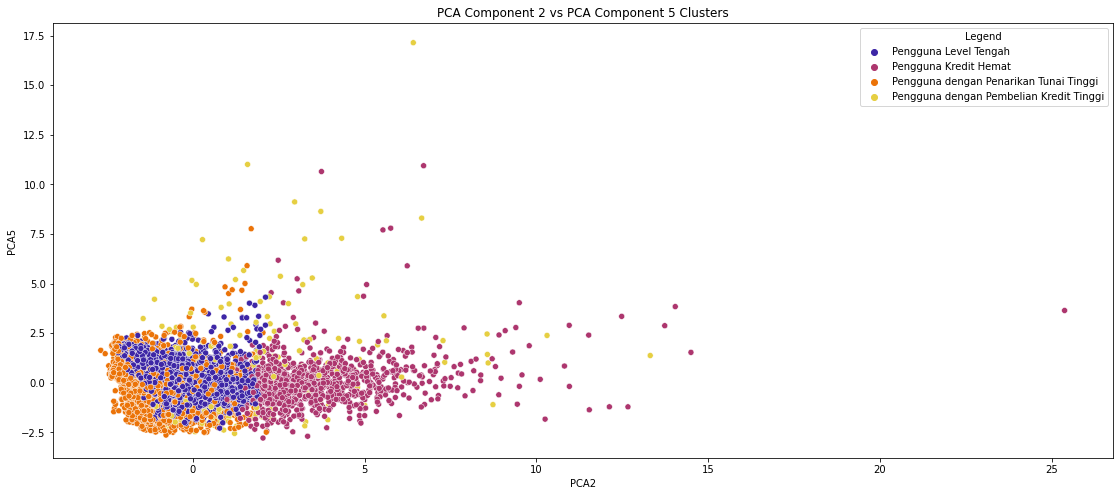

<Figure size 432x288 with 0 Axes>

In [82]:
# Plotting perbandingan PCA 2 dan PCA 5

X = pca_kmeans['PCA2']
Y = pca_kmeans['PCA5']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 2 vs PCA Component 5 Clusters')
plt.show()

plt.savefig("PCA Component 2 vs PCA Component 5 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

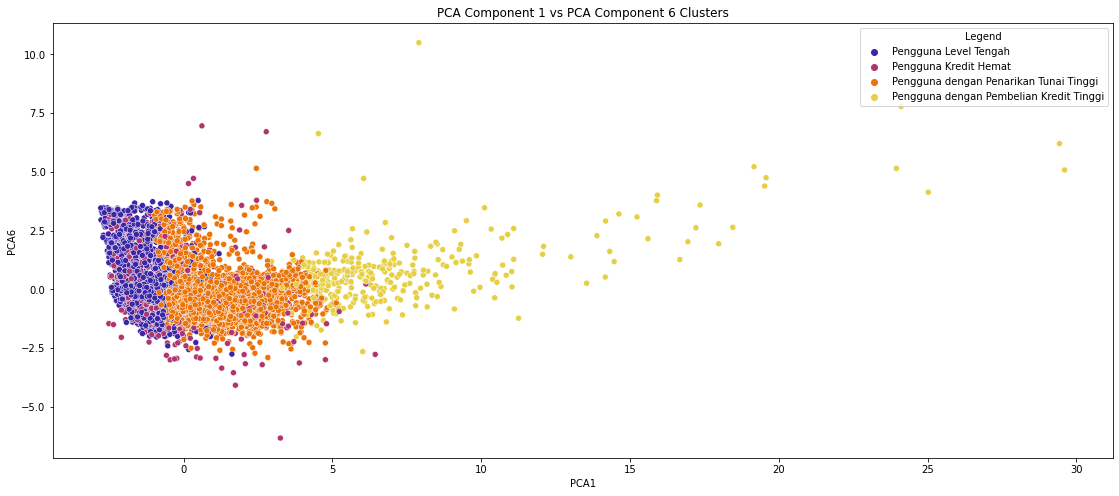

<Figure size 432x288 with 0 Axes>

In [83]:
# Plotting perbandingan PCA 1 dan PCA 6

X = pca_kmeans['PCA1']
Y = pca_kmeans['PCA6']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 1 vs PCA Component 6 Clusters')
plt.show()

plt.savefig("PCA Component 1 vs PCA Component 6 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

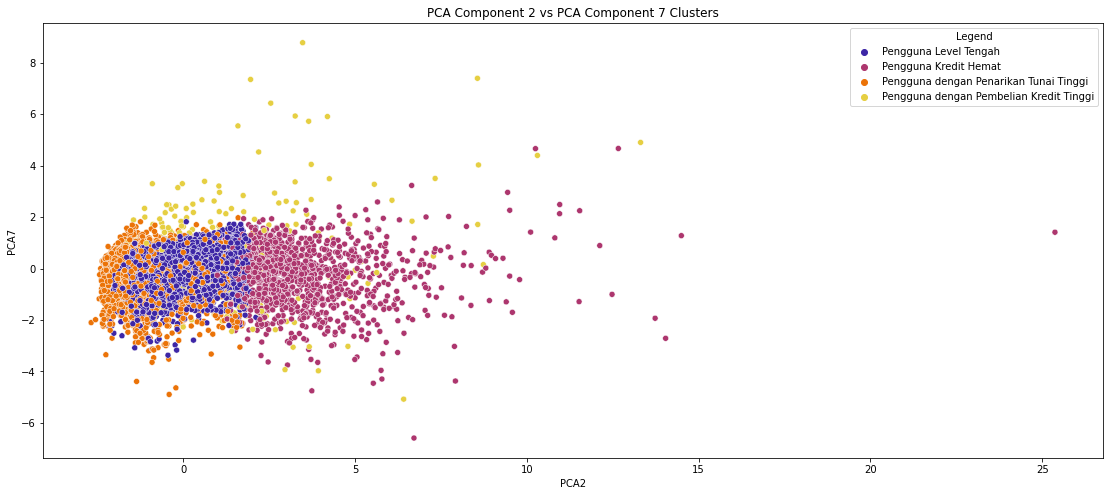

<Figure size 432x288 with 0 Axes>

In [84]:
# Plotting perbandingan PCA 2 dan PCA 7

X = pca_kmeans['PCA2']
Y = pca_kmeans['PCA7']
plt.figure(figsize=(19, 8))
sns.scatterplot(x=X, y=Y, hue = pca_kmeans['Legend'], palette='CMRmap')
plt.title('PCA Component 2 vs PCA Component 7 Clusters')
plt.show()

plt.savefig("PCA Component 2 vs PCA Component 7 Clusters.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

### UMAP Application

Pada percobaan dibutuhkan 7 Components jika ingin mencapai jumlah variance yang ditangkap sebesar 80%. Namun kami akan mencoba menggunakan UMAP untuk teknik pengurangan dimensi yang lebih baik di sini, dan membuat cluster menggunakan pendekatan berbeda ini. Kemudian kami akan mencoba melihat apakah menggunakan UMAP dapat mereduksi dataset ini menjadi 2 dimensi dengan baik.

Sebelumnya diharuskan menentukan jumlah tetangga (neighbors) pada poin untuk memilih jumlah cluster yang tepat. Nilai yang lebih besar untuk tetangga akan memberi kita pandangan data yang lebih luas.

- Melihat 5 baris dataset teratas

In [85]:
df.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


- Melakukan standarisi pada dataset

In [86]:
scaler = StandardScaler()
scaledDf = scaler.fit_transform(df)
scaledDf

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

Kemudian kita akan Melakukan visualisasi untuk melihat 2 dimensi dari dataset yang sudah di standarisasi

- Mendefinisikan model dari UMAP

In [87]:
umap_data = UMAP(n_neighbors=100, 
                 n_components=2, # Untuk menganalisa jika bisa dilakukan split data pada 2 components
                 metric='euclidean', 
                 n_epochs=1000, 
                 learning_rate=0.1, #1.0
                 init='spectral',
                 min_dist=0.1, 
                 spread=1.0,
                 low_memory=False, 
                 set_op_mix_ratio=1.0,
                 local_connectivity=1,
                 repulsion_strength=1.0, 
                 negative_sample_rate=5, 
                 transform_queue_size=4.0, 
                 random_state=3,
                 angular_rp_forest=False,
                 target_n_neighbors=-1, 
                 transform_seed=3, 
                 verbose=False, 
                 unique=False,
                )

In [88]:
umap_data

UMAP(learning_rate=0.1, local_connectivity=1, low_memory=False, n_epochs=1000, n_neighbors=100, random_state=3, transform_seed=3)

- Melatih model dari UMAP data

In [89]:
umap_fit = umap_data.fit_transform(scaledDf)
umap_fit

array([[6.791144 , 6.1488724],
       [9.459104 , 2.2706351],
       [5.3414025, 0.9343754],
       ...,
       [0.8415577, 6.8844423],
       [9.27916  , 8.179706 ],
       [8.916734 , 7.9420023]], dtype=float32)

- Melihat dimensi dari UMAP data

In [90]:
umap_fit.shape

(8950, 2)

- Menambahkan nilai UMAP pada dataframe dengan membuat kolom baru

In [91]:
data_umap = pd.concat([df, pd.DataFrame(umap_fit, columns=['UMAP1', 'UMAP2'])], axis=1)

In [92]:
data_umap.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,UMAP1,UMAP2
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6.791144,6.148872
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,9.459104,2.270635
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5.341403,0.934375
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,6.239720,6.653369
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7.945273,5.394279


- Melihat dimensi dataframe (opsional)

In [93]:
data_umap.shape

(8950, 19)

- Melihat apakah terdapat missing value pada UMAP data

In [94]:
data_umap.isnull().any()

Saldo                         False
FrekuensiSaldo                False
Pembelian                     False
PembelianOneoff               False
PembelianAngsuran             False
PenarikanTunai                False
FrekuensiPembelian            False
FrekuensiPembelianOneoff      False
FrekuensiPembelianAngsuran    False
FrekuensiPenarikanTunai       False
PenarikanTunaiTRX             False
PembelianTRX                  False
BatasKredit                   False
Pembayaran                    False
MinimalPembayaran             False
PembayaranFullPRC             False
JangkaWaktu                   False
UMAP1                         False
UMAP2                         False
dtype: bool

- Menerapkan kembali K-Means ke data yang dikembalikan dari penerapan UMAP yang hanya dengan 2 komponen.

In [95]:
wcss = []
for i in range(1, 18):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans_pca.fit(umap_fit)
    wcss.append(kmeans_pca.inertia_)

- Membuat visualisasi jumlah cluster KMeans dengan UMAP Data

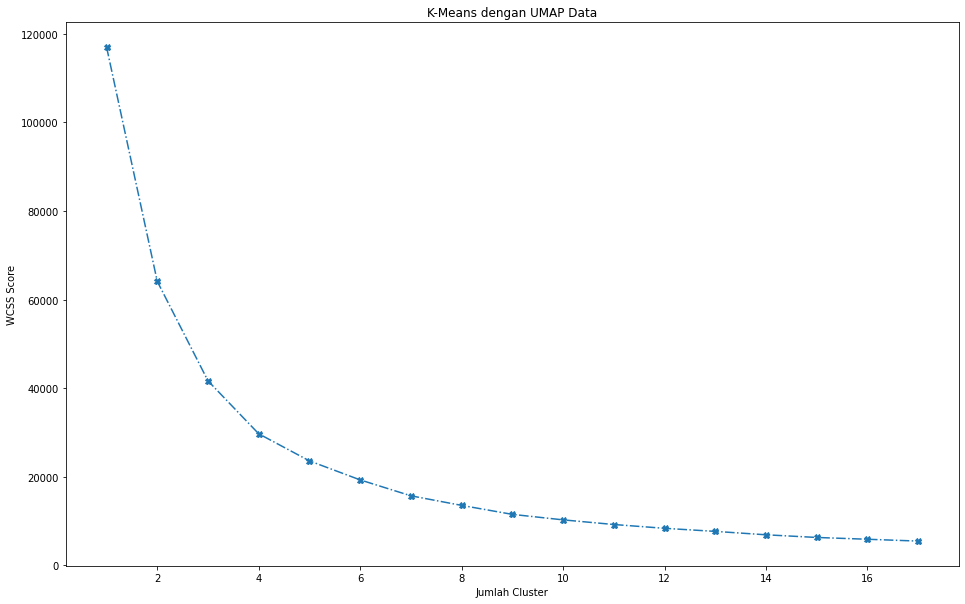

In [96]:
plt.figure(figsize=(16,10))
plt.plot(range(1, 18), wcss, marker='X', linestyle='-.')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS Score')
plt.title('K-Means dengan UMAP Data')
plt.show()

Dengan menggunakan K-Means pada data UMAP, didapatkan jumlah cluster yang optimal yaitu 4 berdasarkan plot Scree. Namun, dengan menggunakan 4 cluster diperoleh score WCSS yang jauh lebih rendah daripada ketika diterapkan pada komponen PCA.

- Melatih KMeans UMAP dengan n_clusters = 4

In [97]:
kmeans_umap = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_umap.fit(umap_fit)

KMeans(n_clusters=4, random_state=42)

- Memasukan hasil KMeans UMAP segmen ke dalam dataframe

In [98]:
data_umap_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(umap_fit)], axis=1)
data_umap_kmeans.columns.values[-2:] = ['UMAP1', 'UMAP2']

data_umap_kmeans['K-Means UMAP Segment'] = kmeans_umap.labels_
data_umap_kmeans

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,UMAP1,UMAP2,K-Means UMAP Segment
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6.791144,6.148872,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,9.459104,2.270635,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5.341403,0.934375,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,6.239720,6.653369,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7.945273,5.394279,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0.791679,6.654212,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0.861075,7.049713,2
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0.841558,6.884442,2
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,9.279160,8.179706,3


- Melihat persebaran data pada masing-masing cluster (K-Means UMAP Segment)

In [99]:
data_umap_kmeans['K-Means UMAP Segment'].value_counts()

0    2774
1    2647
3    1984
2    1545
Name: K-Means UMAP Segment, dtype: int64

Menggunakan pendekatan 4 cluster K-Means yang sama, menggunakan UMAP tampaknya mengembalikan kelas yang kurang seimbang dibandingkan dengan PCA.

- Melihat frekuensi rata-rata KMeans UMA Segment dengan melakukan grouping

In [100]:
umap_kmeans_freq = data_umap_kmeans.groupby(['K-Means UMAP Segment']).mean()
umap_kmeans_freq

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,UMAP1,UMAP2
K-Means UMAP Segment,,,,,,,,,,,,,,,,,,,
0,1742.203699,0.983548,2371.630184,1437.218136,934.773115,425.166448,0.864043,0.453970,0.650219,0.070542,1.509012,34.505407,5396.236154,2466.778485,1379.524682,0.169456,11.941961,4.325445,2.208151
1,2867.918238,0.983454,327.231458,250.902225,76.429195,2269.837495,0.162319,0.104475,0.073468,0.297986,7.863241,4.032867,4897.627961,2085.590860,1067.382873,0.026409,11.883642,9.273200,3.073458
2,142.377079,0.778493,576.492718,89.488460,487.663793,98.573782,0.775554,0.048848,0.709838,0.019859,0.339159,12.261489,3098.488346,703.197626,189.919882,0.481871,11.080259,2.681283,5.717460
3,684.387340,0.663929,324.051517,258.605595,65.648266,716.193744,0.183413,0.101144,0.084092,0.097987,1.790827,3.183468,3781.997648,1039.210997,310.647889,0.046008,10.775202,7.244793,6.814408


- Memberikan nama label pada cluster seperti sebelumnya dan menjelajahi beberapa variabel dengan cluster yang dihasilkan dengan segmen UMAP

In [101]:
data_umap_kmeans['Labels'] = data_umap_kmeans['K-Means UMAP Segment'].map({0:'Pengguna yang Bergantung Pada Uang Muka', 
                                                                           1:'Pengguna dengan Pembelian dan Kredit Besar', 
                                                                           2:'Pengguna Normal (Standard)', 
                                                                           3:'Pengguna dengan Cicilan Pembelian dan Minimal Kredit'})

In [102]:
data_umap_kmeans.head()

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,UMAP1,UMAP2,K-Means UMAP Segment,Labels
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6.791144,6.148872,3,Pengguna dengan Cicilan Pembelian dan Minimal ...
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,9.459104,2.270635,1,Pengguna dengan Pembelian dan Kredit Besar
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5.341403,0.934375,0,Pengguna yang Bergantung Pada Uang Muka
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,6.239720,6.653369,3,Pengguna dengan Cicilan Pembelian dan Minimal ...
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7.945273,5.394279,3,Pengguna dengan Cicilan Pembelian dan Minimal ...


- Melakukan eksplorasi pada UMAP K-Means Clusters 

**Penarikan Tunai vs Pembelian Angsuran**

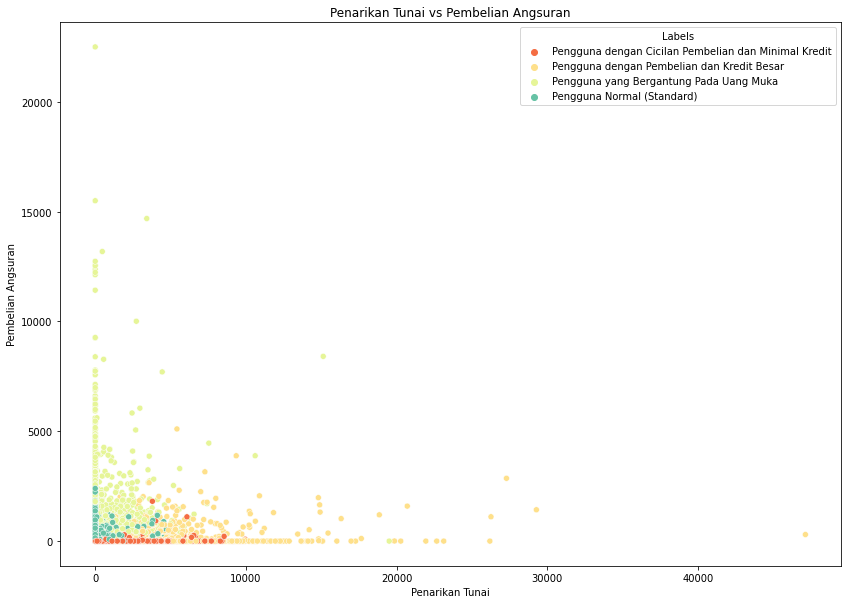

<Figure size 432x288 with 0 Axes>

In [103]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['PenarikanTunai']
Y = data_umap_kmeans['PembelianAngsuran']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['Labels'], palette = 'Spectral')
g.set_xlabel('Penarikan Tunai')
g.set_ylabel('Pembelian Angsuran')
g.set_title('Penarikan Tunai vs Pembelian Angsuran')
plt.show()

plt.savefig("Penarikan Tunai vs Pembelian Angsuran UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Pada hasil grafik bisa dilihat bahwa Pengguna yang bergantung pada uang muka yang ditunjukkan dengan warna hijau muda dapat melakukan banyak pembelian angsuran (cicilan) tanpa harus melakukan penarikan tunai atau mengambil uang muka menggunakan kredit.

Sedangkan, Pengguna dengan pembelian dan kredit besar yang ditunjukan dengan warna orange umumya memiliki penggunaan uang muka atau penarikan tunai yang lebih tinggi yang artinya ia sangat bergantung pada uang muka tunai walaupun berada di ujung bawah pembelian angsuran

**Pembelian vs Pembayaran**

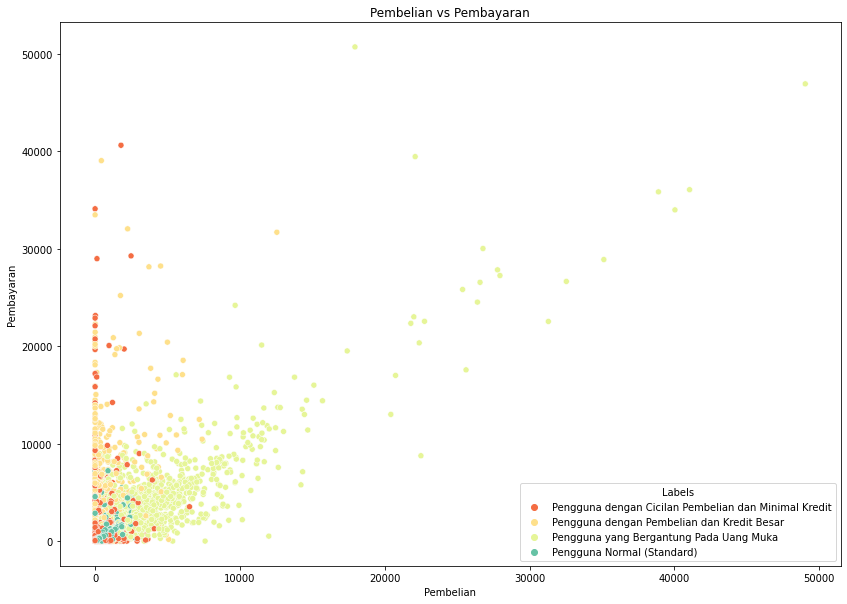

<Figure size 432x288 with 0 Axes>

In [104]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['Pembelian']
Y = data_umap_kmeans['Pembayaran']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['Labels'], palette = 'Spectral')
g.set_xlabel('Pembelian')
g.set_ylabel('Pembayaran')
g.set_title('Pembelian vs Pembayaran')

plt.show()

plt.savefig("Pembelian vs Pembayaran UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Pada grafik terlihat bahwa pengguna yang bergantung pada uang muka (hijau muda) paling banyak melakukan pembelian dan pembayaran dengan jumlah melebihi 40000, sedangkan Pengguna dengan cicilan pembelian dan minimal kredit (warna merah) serta Pengguna dengan pembelian dan kredit besar (orange) hampir memiliki persebaran yang sama dimana keduanya memiliki pembayaran yang tinggi dengan kurang lebih 40000. Terakhir Pengguna normal (standard) dengan warna biru memiliki pembelian dan pembayan yang kecil yaitu kurang dari 10000

**Pembelian Satu Kali (one off) vs Batas Kredit**

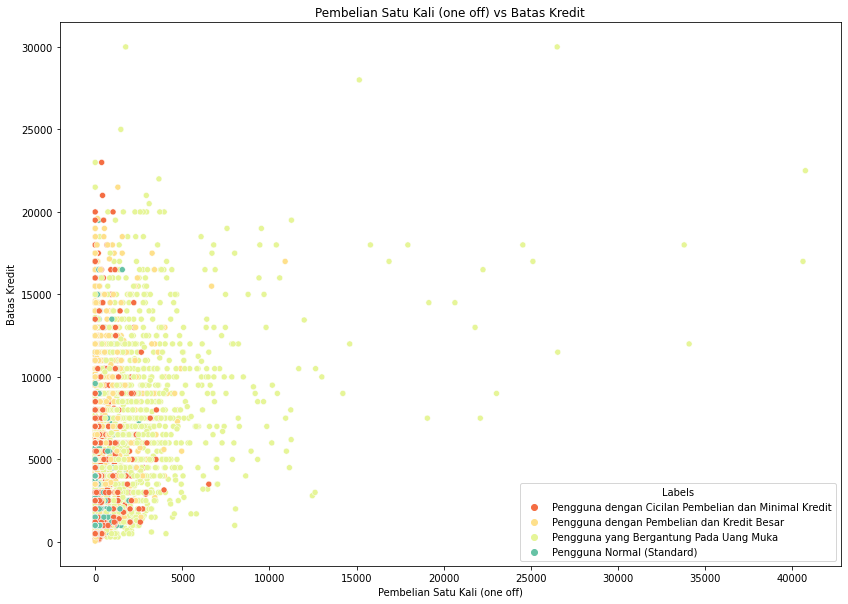

<Figure size 432x288 with 0 Axes>

In [105]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['PembelianOneoff']
Y = data_umap_kmeans['BatasKredit']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['Labels'], palette = 'Spectral')
g.set_xlabel('Pembelian Satu Kali (one off)')
g.set_ylabel('Batas Kredit')
g.set_title('Pembelian Satu Kali (one off) vs Batas Kredit')

plt.show()

plt.savefig("Pembelian Satu Kali (one off) vs Batas Kredit UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik terlihat bahwa semua cluster atau bagian rata-rata memiliki batas kredit kurang lebih 24000 dengan pembelian one off kurang lebih 11000. Namun pada cluster pengguna yang bergantung pada uang muka (hijau muda) terdapat beberapa pengguna dengan batas kredit lebih dari 24000 dan pembelian one off lebih dari 11000

**Saldo vs Minimal / Minimum Pembayaran**

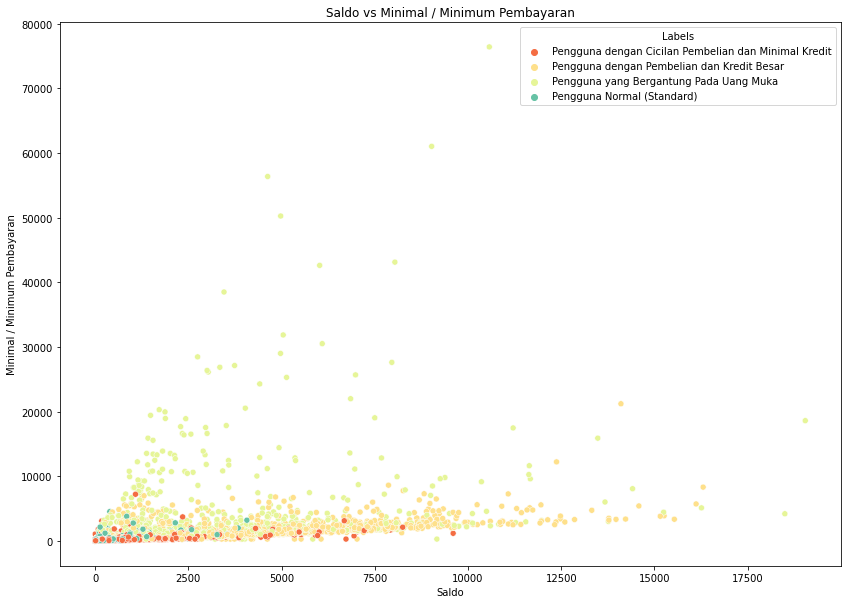

<Figure size 432x288 with 0 Axes>

In [106]:
plt.figure(figsize=(14,10))
X = data_umap_kmeans['Saldo']
Y = data_umap_kmeans['MinimalPembayaran']
g = sns.scatterplot(x=X, y=Y, hue = data_umap_kmeans['Labels'], palette = 'Spectral')
g.set_xlabel('Saldo')
g.set_ylabel('Minimal / Minimum Pembayaran')
g.set_title('Saldo vs Minimal / Minimum Pembayaran')

plt.show()

plt.savefig("Saldo vs Minimum Pembayaran UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dari grafik dapat dilihat bahwa cluster Pengguna yang bergantung pada uang muka (hijau muda) memiliki saldo tinggi yang serupa dengan cluster pengguna dengan pembelian dan kredit besar (orange). Dapat dilihat bahwa cluster Pengguna yang bergantung pada uang muka (hijau muda) bagaimanapun memiliki pembayaran minimum yang lebih tinggi, hal ini sesuai karena cluster ini membeli paling banyak dibandingkan dengan yang lain.

- Membuat pie chart yang sama dengan data yang menggunakan PCA untuk memvisualisasikan Jumlah Pengamatan per Segment

In [107]:
umap_kmeans_freq['JumlahPengamatan'] = data_umap_kmeans[['K-Means UMAP Segment', 'Saldo']].groupby(['K-Means UMAP Segment']).count()
umap_kmeans_freq['ProporsiPengamatan'] = umap_kmeans_freq['JumlahPengamatan'] / umap_kmeans_freq['JumlahPengamatan'].sum()
umap_kmeans_freq = umap_kmeans_freq.rename({0:'Pengguna yang Bergantung Pada Uang Muka', 
                                            1:'Pengguna dengan Pembelian dan Kredit Besar',
                                            2:'Pengguna Normal (Standard)',
                                            3:'Pengguna dengan Cicilan Pembelian dan Minimal Kredit'})
umap_kmeans_freq

,Saldo,FrekuensiSaldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,FrekuensiPembelian,FrekuensiPembelianOneoff,FrekuensiPembelianAngsuran,FrekuensiPenarikanTunai,PenarikanTunaiTRX,PembelianTRX,BatasKredit,Pembayaran,MinimalPembayaran,PembayaranFullPRC,JangkaWaktu,UMAP1,UMAP2,JumlahPengamatan,ProporsiPengamatan
K-Means UMAP Segment,,,,,,,,,,,,,,,,,,,,,
Pengguna yang Bergantung Pada Uang Muka,1742.203699,0.983548,2371.630184,1437.218136,934.773115,425.166448,0.864043,0.453970,0.650219,0.070542,1.509012,34.505407,5396.236154,2466.778485,1379.524682,0.169456,11.941961,4.325445,2.208151,2774,0.309944
Pengguna dengan Pembelian dan Kredit Besar,2867.918238,0.983454,327.231458,250.902225,76.429195,2269.837495,0.162319,0.104475,0.073468,0.297986,7.863241,4.032867,4897.627961,2085.590860,1067.382873,0.026409,11.883642,9.273200,3.073458,2647,0.295754
Pengguna Normal (Standard),142.377079,0.778493,576.492718,89.488460,487.663793,98.573782,0.775554,0.048848,0.709838,0.019859,0.339159,12.261489,3098.488346,703.197626,189.919882,0.481871,11.080259,2.681283,5.717460,1545,0.172626
Pengguna dengan Cicilan Pembelian dan Minimal Kredit,684.387340,0.663929,324.051517,258.605595,65.648266,716.193744,0.183413,0.101144,0.084092,0.097987,1.790827,3.183468,3781.997648,1039.210997,310.647889,0.046008,10.775202,7.244793,6.814408,1984,0.221676


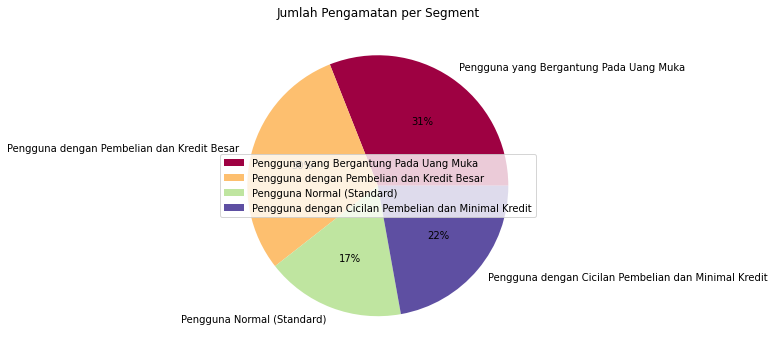

<Figure size 432x288 with 0 Axes>

In [108]:
umap_kmeans_freq.plot.pie(y='JumlahPengamatan', figsize=(6, 6), autopct='%1.0f%%', cmap = 'Spectral')
plt.ylabel(None, loc='center')
plt.legend(loc='center right')
plt.title('Jumlah Pengamatan per Segment')
plt.show()

plt.savefig("Jumlah Pengamatan per Segment UMAP.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

Dengan menggunakan UMAP sebagai teknik pengurangan dimensi dengan skema K-Means yang sama, diperoleh cluster yang lebih seimbang daripada saat menggunakan PCA.

## 10. Model Inference
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

Untuk model inference kami akan menggunakan model Random Forest dimana akan dilakukan prediksi bedasarkan inputan yang ada akan masuk ke cluster yang mana

Untuk kolom yang dipakai yaitu `Saldo`, `PenarikanTunai`, `PembelianAngsuran`, `Pembelian`, `Pembayaran`, `PembelianOneoff`, `BatasKredit`, `MinimalPembayaran`, dan `JangkaWaktu`

- Melihat informasi dataset

In [109]:
data = data_umap_kmeans.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Saldo                       8950 non-null   float64
 1   FrekuensiSaldo              8950 non-null   float64
 2   Pembelian                   8950 non-null   float64
 3   PembelianOneoff             8950 non-null   float64
 4   PembelianAngsuran           8950 non-null   float64
 5   PenarikanTunai              8950 non-null   float64
 6   FrekuensiPembelian          8950 non-null   float64
 7   FrekuensiPembelianOneoff    8950 non-null   float64
 8   FrekuensiPembelianAngsuran  8950 non-null   float64
 9   FrekuensiPenarikanTunai     8950 non-null   float64
 10  PenarikanTunaiTRX           8950 non-null   int64  
 11  PembelianTRX                8950 non-null   int64  
 12  BatasKredit                 8950 non-null   float64
 13  Pembayaran                  8950 

- Menghapus kolom yang tidak diperlukan

In [110]:
drop_cols = ['FrekuensiSaldo', 'FrekuensiPembelian', 'FrekuensiPembelianOneoff', 'FrekuensiPembelianAngsuran', 
             'FrekuensiPenarikanTunai', 'PenarikanTunaiTRX', 'PembelianTRX', 'PembayaranFullPRC', 'UMAP1', 'UMAP2', 
             'K-Means UMAP Segment']

In [111]:
data = data.drop(drop_cols, axis=1)
data.head()

,Saldo,Pembelian,PembelianOneoff,PembelianAngsuran,PenarikanTunai,BatasKredit,Pembayaran,MinimalPembayaran,JangkaWaktu,Labels
0,40.900749,95.40,0.00,95.4,0.000000,1000.0,201.802084,139.509787,12,Pengguna dengan Cicilan Pembelian dan Minimal ...
1,3202.467416,0.00,0.00,0.0,6442.945483,7000.0,4103.032597,1072.340217,12,Pengguna dengan Pembelian dan Kredit Besar
2,2495.148862,773.17,773.17,0.0,0.000000,7500.0,622.066742,627.284787,12,Pengguna yang Bergantung Pada Uang Muka
3,1666.670542,1499.00,1499.00,0.0,205.788017,7500.0,0.000000,312.343947,12,Pengguna dengan Cicilan Pembelian dan Minimal ...
4,817.714335,16.00,16.00,0.0,0.000000,1200.0,678.334763,244.791237,12,Pengguna dengan Cicilan Pembelian dan Minimal ...


- Melakukan inisialisasi variabel X dan y

Disini kami mendefinisikan untuk variabel X nya yaitu kolom selain `Labels`, sedangkan untuk variabel y yaitu `Labels`

In [112]:
X = data.drop(['Labels'], axis=1)
y = data['Labels']

print(X.shape)
print(y.shape)

(8950, 9)
(8950,)


- Membagi data menjadi Training dan Testing pada kolom atau atribut yang sudah diperoleh. Untuk proporsi Training data sebesar 80% (0.80) dan Testing data sebesar 20% (0.20)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.20, random_state=13)

In [114]:
print(X_train.shape)
print(X_test.shape)

(7160, 9)
(1790, 9)


- Pendefinisian Model dan pelatihan model random forest classifier dengan GAUSSIAN CLASSIFIER n estimator 100

In [115]:
clf = RandomForestClassifier(n_estimators=100)

In [116]:
RFC = clf.fit(X_train, y_train)
RFC

RandomForestClassifier()

- memeriksa performa dengan .prdict_proba() yang mengembalikan matriks probabilitas bahwa keluaran yang diprediksi sama dengan nol / sat

In [117]:
RFC.predict_proba(X_test)

array([[0.  , 0.  , 1.  , 0.  ],
       [0.01, 0.1 , 0.  , 0.89],
       [0.  , 0.09, 0.91, 0.  ],
       ...,
       [0.5 , 0.12, 0.  , 0.38],
       [0.05, 0.01, 0.05, 0.89],
       [0.01, 0.01, 0.97, 0.01]])

- melihat predicted outputs dengan .predict()

In [118]:
y_pred = RFC.predict(X_test)
y_pred

array(['Pengguna dengan Pembelian dan Kredit Besar',
       'Pengguna yang Bergantung Pada Uang Muka',
       'Pengguna dengan Pembelian dan Kredit Besar', ...,
       'Pengguna Normal (Standard)',
       'Pengguna yang Bergantung Pada Uang Muka',
       'Pengguna dengan Pembelian dan Kredit Besar'], dtype=object)

- melihat nilai akurasi dengan .score

In [119]:
print("Test score:", RFC.score(X_test, y_test))
print("Train score:", RFC.score(X_train, y_train))

Test score: 0.8385474860335196
Train score: 1.0


didapatkan hasil nilai Score untuk test data / pengujian data yaitu 84% (0.838), sedangkan jika dibandingkan dengan train data /pelatihan data nilai scorenya 100% (1.0)

- Melihat confussion matrix dan classification report dari model

In [120]:
confusion_matrix(y_test, y_pred)

array([[263,  23,   1,  25],
       [ 35, 297,  34,  34],
       [  2,  29, 445,  30],
       [ 17,  29,  30, 496]], dtype=int64)

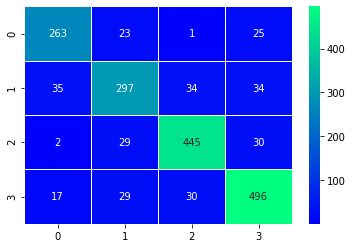

                                                      precision    recall  f1-score   support

                          Pengguna Normal (Standard)       0.83      0.84      0.84       312
Pengguna dengan Cicilan Pembelian dan Minimal Kredit       0.79      0.74      0.76       400
          Pengguna dengan Pembelian dan Kredit Besar       0.87      0.88      0.88       506
             Pengguna yang Bergantung Pada Uang Muka       0.85      0.87      0.86       572

                                            accuracy                           0.84      1790
                                           macro avg       0.83      0.83      0.83      1790
                                        weighted avg       0.84      0.84      0.84      1790



In [121]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap = 'winter')
plt.show()
print(classification_report(y_test, y_pred))

- Melihat summary dari evaluasi model

In [122]:
print('Ringkasan Evaluasi Model Random Forest Classifier')
print('Akurasi :', accuracy_score(y_test, y_pred))
print('Presisi :', precision_score(y_test,y_pred, average='macro'))
print('Recall :', recall_score(y_test,y_pred, average='macro'))
print('F1 Score :', f1_score(y_test,y_pred, average='macro'))

Ringkasan Evaluasi Model Random Forest Classifier
Akurasi : 0.8385474860335196
Presisi : 0.8339448875077007
Recall : 0.8330070563494477
F1 Score : 0.833279552464


Dari Evaluasi model diketahui bahwa hasil akurasi model random forest classifier yaitu 84% (0.838) yang artinya hasil sudah baik dan bisa dibilang akurat sehingga model ini bisa digunakan untuk dilakukan penentuan cluster pengguna

- Melakukan prediksi penentuan cluster

In [123]:
print('--- PREDIKSI PENENTUAN CLUSTER PENGGUNA KARTU KREDIT MENGGUNAKAN RANDOM FOREST ---')
print('='*100)

saldo = float(input('Jumlah Saldo Pengguna (exp : 40.9321) = '))
pembelian = float(input('Jumlah Pembelian yang Dilakukan Pengguna (exp : 16.0) = '))
pembelianoneoff = float(input('Banyaknya Satu Kali Pembelian yang Dilakukan Pengguna (exp : 16.0) = '))
pembelianangsuran = float(input('Jumlah Pembelian Angsuran yang Dilakukan Pengguna (exp : 95.0) = '))
penarikantunai = float(input('Jumlah Penarikan Tunai yang Dilakukan Pengguna (exp : 205.23) = '))
bataskredit = float(input('Jumlah Batas Kredit Pengguna (exp : 7000.0) = '))
pembayaran = float(input('Jumlah Pembayaran yang Harus Dibayarkan Pengguna (exp : 312.87) = '))
minimalpembayaran = float(input('Jumlah Minimal Pembayaran yang Harus Dibayarkan Pengguna (exp : 1072.87) = '))
jangkawaktu = int(input('Jangka Waktu Pengguna Kredit (inputan : 6/7/8/9/10/11/12) = '))

val = [saldo, pembelian, pembelianoneoff, pembelianangsuran, penarikantunai, bataskredit, pembayaran, 
       minimalpembayaran, jangkawaktu]
print(val)

predict_rfc = RFC.predict([val])
print('='*100)
print('Berdasarkan analisa, pengguna masuk kedalam cluster : ', predict_rfc)

--- PREDIKSI PENENTUAN CLUSTER PENGGUNA KARTU KREDIT MENGGUNAKAN RANDOM FOREST ---
Jumlah Saldo Pengguna (exp : 40.9321) = 40.9321
Jumlah Pembelian yang Dilakukan Pengguna (exp : 16.0) = 16.0
Banyaknya Satu Kali Pembelian yang Dilakukan Pengguna (exp : 16.0) = 16.0
Jumlah Pembelian Angsuran yang Dilakukan Pengguna (exp : 95.0) = 95.0
Jumlah Penarikan Tunai yang Dilakukan Pengguna (exp : 205.23) = 205.23
Jumlah Batas Kredit Pengguna (exp : 7000.0) = 7000.0
Jumlah Pembayaran yang Harus Dibayarkan Pengguna (exp : 312.87) = 312.87
Jumlah Minimal Pembayaran yang Harus Dibayarkan Pengguna (exp : 1072.87) = 1072.87
Jangka Waktu Pengguna Kredit (inputan : 6/7/8/9/10/11/12) = 12
[40.9321, 16.0, 16.0, 95.0, 205.23, 7000.0, 312.87, 1072.87, 12]
Berdasarkan analisa, pengguna masuk kedalam cluster :  ['Pengguna dengan Cicilan Pembelian dan Minimal Kredit']


Pada percobaan prediksi diatas kami mencoba memasukkan inputan Jumlah Saldo Pengguna 40.9321, Jumlah Pembelian yang Dilakukan Pengguna 16.0, Banyaknya Satu Kali Pembelian yang Dilakukan Pengguna 16.0, Jumlah Pembelian Angsuran yang Dilakukan Pengguna 95.0, Jumlah Penarikan Tunai yang Dilakukan Pengguna 205.23, Jumlah Batas Kredit Pengguna 7000.0, Jumlah Pembayaran yang Harus Dibayarkan Pengguna 312.87, Jumlah Minimal Pembayaran yang Harus Dibayarkan Pengguna 1072.87, dan Jangka Waktu Pengguna Kredit 12. 

Dengan data tersebut didapatkan hasil bahwa pengguna masuk kedalam cluster :  **['Pengguna dengan Cicilan Pembelian dan Minimal Kredit']**

*Kode program juga bisa di run lagi dan diisi dengan data yang diinginkan.*

### Save and Finalize Model
disini kami menggunakan operasi Pickle untuk menyimpan format serialized ke sebuah file dan menggunakannya untuk membuat prediksi baru

In [124]:
pickle.dump(RFC, open('model_FP4.pkl', 'wb'))

## 11. Pengambilan Kesimpulan

Dari analisis yang telah kami lakukan, diperoleh kesimpulan sebagai berikut:
- Pada analisa kali ini kami menggunakan model KMeans, PCA, dan bantuan UMAP Application untuk melakukan clustering pada data pengguna kartu kredit
- Pada KMeans kami memilih 4 cluster berdasarkan pengamatan pada elbow method
- Pada model PCA kami memilih menggunakan 7 component untuk dilakukan analisis guna mempertahankan setidaknya 80% dari varians yang ditangkap dalam data, kemudian dengan menggunakan UMAP Application kami melakukan reduksi jumlah component menjadi 2 dimensi
- Alasan penggunaan UMAP Application yaitu karena UMAP bekerja dengan baik dalam menemukan kesamaan dan dapat mempertahankan struktur global data. Dengan menggunakan 2 component berdasarkan UMAP, kami memperoleh kelompok cluster yang lebih seimbang dan masih menemukan beberapa perbedaan besar di antara mereka.
- Berdasarkan analisis kami dengan menggunakan elbow method, didapatkan jumlah cluster 4 merupakan jumlah yang optimal. Cluster atau label yang ada diantaranya yaitu cluster Pengguna yang Bergantung Pada Uang Muka sebanyak 31%, cluster Pengguna dengan Pembelian dan Kredit Besar sebanyak 30%, cluster Pengguna Normal (Standard) sebanyak 17%, cluster Pengguna dengan Cicilan Pembelian dan Minimal Kredit sebanyak 22%
- Kemudian untuk prediksi cluster pelanggan kami menggunakan model random forest classifier dan didapatkan tingkat akurasinya yaitu 84%
- Untuk melakukan prediksi, variabel dependen yang digunakan yaitu `Saldo`, `PenarikanTunai`, `PembelianAngsuran`, `Pembelian`, `Pembayaran`, `PembelianOneoff`, `BatasKredit`, `MinimalPembayaran`, dan `JangkaWaktu`. Sedangkan untuk variabel dependen atau target yang digunakan yaitu `Labels`
- Pada analisis ini kami juga membuat beberapa visualisasi menggunakan lineplot, boxplot, histogram, pie chart, dan matriks korelasi (heatmap) dan juga kami melakukan beberapa contoh groupby dan query terhadap data yang ada
- Untuk mengatasi missing value pada analisis ini kami menggunakan pengisian missing value dengan menggunakan median